<a href="https://colab.research.google.com/github/imanrazak/ISYS5002_Projects/blob/main/Code_Development_Colab_Iman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2: Analysis of Cardiovascular Disease Risk
The process of problemsolving can be broken down into six steps:
1.	State the problem clearly (In Business Report)
2.	Describe the input and output (In Business Report)
3.	Work a simple example by hand
4.	Develop an algorithm/pseudocode
5.	Convert to Python
6.	Test solution with a variety of data


#3. Work a simple example by hand
To solve the problem, one would have to look into different factors such as demographic factor (gender, age), clinical factors (cholesterol, glucose levels, blood pressure) and lifestyle factors (smoking, alcohol consumption, physical activity). Based on these different factors, one must look into different combinations of these factors, and that could look like this:

1. **Gender + Smoking status:**
If you are a smoker or a non-smoker (lifestyle) and you are a female or a male (demographic), then the different genders and the different smoke-status will give different relevant risks, generating a mean that will tell the likeliness of developing a cardiovascular heart disease (https://pmc.ncbi.nlm.nih.gov/articles/PMC3181845/).

2. **Age group + glucose levels:**
Having done research of the topic, following trends are likely to be seen from the analysis:
- Higher age groups are leading to higher risks of developing a cardiovascular health disease (https://www.nia.nih.gov/health/heart-health/heart-health-and-aging)
- Higher blood glucose levels increase the risk of cardiovascular health disease (https://pmc.ncbi.nlm.nih.gov/articles/PMC9562876/#sec6-cells-11-03034)


3. **Age group + blood pressure + physical activity:**
To work the problem by hand, research data on these factors.
Find out what age groups are more likely to have higher blood pressures.
Find what age groups are likely to have more or less physical activity.
Find out whether higher or lower blood pressures are more likely to have cardiovascular risks.
Find out if physically active or non physically active individuals have higher chances of developing heart risks.
Based on the research by hand, I found that older people are less likely to be physically active, are likely have higher blood pressures, all of which are factors that contribute to higher heart risk . Being older in itself also increases heart risk.

  (https://www.nia.nih.gov/health/heart-health/heart-health-and-aging#:~:text=Changes%20in%20the%20heart%20and%20blood%20vessels%20that%20happen%20with,of%20life%20for%20older%20people).

4. **Gender + Cholesterol + Alcohol Consumption:**
To work the problem by hand, research data on these factors.
Find out what genders are more likely to drink alcohol.
Find the link between alcohol consumption and cholesterol.
Find out whether high cholesterol leads to higher heart risk.
Find the link between genders and cholesterol.
Based on the researching by hand, I found that males are more likely to drink alcohol, in turn leading to higher cholesterol, all of which are factors that contribute to higher heart risk.

  https://pmc.ncbi.nlm.nih.gov/articles/PMC7590834/#:~:text=In%20general%2C%20males%20still%20consume,than%20alcohol%20use%20among%20females.
  
  https://www.healthline.com/health/high-cholesterol/effects-of-alcohol

  https://www.nia.nih.gov/health/heart-health/heart-health-and-aging#:~:text=Changes%20in%20the%20heart%20and%20blood%20vessels%20that%20happen%20with,of%20life%20for%20older%20people).

#4. Develop an algorithm/pseudocode
**Algorithm**

    Import the necessary libraries
    Upload the dataset ("cardiohealth.db")
    Inspect the dataset
    Explore the data
    Clean and pre-process the data so it can be used in the analysis
    Analyse the chance of developing a cardiovascular heart disease based on the different combinations:
    Choose four combinations of factors

    1. One combination of a democraphic factor and a lifestyle factor (gender and smoking)

    2. One combination of a demographic factor and a clinical factor (age and glucose level)

    3. Two combinations of any demographic factor, clinical factor and lifestyle factor (age group, blood pressure and physical activity; gender, cholesterol and alcohol consumption)

    Extract the relevant data for the chosen analysis
    Process the data further for analysis
    Visualize the findings for each combination
    Describe the findings and analyse the results
    


**Pseudocode**

1. Lifestyle and demographic factors
- Group data by gender and smoke-status.
- Rename "mean" to "proportion with cardiovascular desease"
- Calculate the risk for each gender with each smoke-factor
- Visualize the correlation between gender and smoke-status

2. Demographic and Clinical Factor
    
    
    Extract the relevant data from the med_ex_df dataframe into a new dataframe
    Create an insight to the relationship between age and glucose level
    group the age group and glucose, count them and calculate the relative occurence of each glucose level in each age group
    Visualize and discuss the correlation between age and glucose level
    Create an insight to the impact of age and glucose level on the cardiovascular disease risk
    group age group, glucose level and cardiovascular health and calculate the relative risk of developing a disease in each group
    Visualize and discuss the patterns found



#5. Convert to Python

###Import the necessary libraries
First, all necessary libraries need to be imported to be able to use them.

In [ ]:
#Import the necessary libraries
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


###Load the dataset and inspect it
The database "cardiohealth.db" is given and uploaded in the data folder. Now we need to access the database by creating a connection and create a cursor object.

In [ ]:
#create a connection object to the uploaded database cardiohealth.db
conn = sql.connect('cardiohealth.db')

#create a cursor object to execute SQL queries against a database
cur = conn.cursor()

First, we need to inspect the database and see what tables are given:

In [ ]:
#inspect what is given, looking for tables
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cur.execute(sql)
cur.fetchall()

[('medical_examination',)]

The database "cardiohealth.db" contains one table which is called "medical_examination".
Now we have to inspect the table to see what details are given.

In [ ]:
#inspecting the details of the table 'medical_examination'
sql='''
PRAGMA table_info('medical_examination');
'''
cur.execute(sql)
cur.fetchall()

[(0, 'id', 'INTEGER', 0, None, 0),
 (1, 'age', 'INTEGER', 0, None, 0),
 (2, 'gender', 'INTEGER', 0, None, 0),
 (3, 'height', 'INTEGER', 0, None, 0),
 (4, 'weight', 'REAL', 0, None, 0),
 (5, 'ap_hi', 'INTEGER', 0, None, 0),
 (6, 'ap_lo', 'INTEGER', 0, None, 0),
 (7, 'cholesterol', 'INTEGER', 0, None, 0),
 (8, 'gluc', 'INTEGER', 0, None, 0),
 (9, 'smoke', 'INTEGER', 0, None, 0),
 (10, 'alco', 'INTEGER', 0, None, 0),
 (11, 'active', 'INTEGER', 0, None, 0),
 (12, 'cardio', 'INTEGER', 0, None, 0)]

The table "medical_examination" contains 13 attributes. Since the assignment taks does not contain height and weight in the factor groups, we do not include them in the med_ex_df dataframe in the following.


In [ ]:
#put 'medical_exmaination' into dataframe, only what is relevant for later (not height and weight since we dont need the BMI)
sql='''
SELECT id, age, gender, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio from medical_examination;
'''
# Load the data into a DataFrame
med_ex_df = pd.read_sql_query(sql, conn)

After every session the connection must be closed:

In [ ]:
#Close the connection
#The connection must be closed at the end of the session

conn.close()

###Explore the data
Now we want to see how the dataframe looks like, we look at the first 10 rows.

In [ ]:
#show the first 10 rows of the dataframe
med_ex_df.head(10)

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,110,80,1,1,0,0,1,0
1,1,20228,1,140,90,3,1,0,0,1,1
2,2,18857,1,130,70,3,1,0,0,0,1
3,3,17623,2,150,100,1,1,0,0,1,1
4,4,17474,1,100,60,1,1,0,0,0,0
5,8,21914,1,120,80,2,2,0,0,0,0
6,9,22113,1,130,80,3,1,0,0,1,0
7,12,22584,2,130,90,3,3,0,0,1,1
8,13,17668,1,110,70,1,1,0,0,1,0
9,14,19834,1,110,60,1,1,0,0,0,0


In [ ]:
#show the last 10 rows of the dataframe
med_ex_df.tail(10)

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69990,99986,15094,1,110,70,1,1,0,0,1,1
69991,99988,20609,1,130,90,2,2,0,0,1,0
69992,99990,18792,1,170,90,1,1,0,0,1,1
69993,99991,19699,1,130,90,1,1,0,0,1,1
69994,99992,21074,1,150,80,1,1,0,0,1,1
69995,99993,19240,2,120,80,1,1,1,0,1,0
69996,99995,22601,1,140,90,2,2,0,0,1,1
69997,99996,19066,2,180,90,3,1,0,1,0,1
69998,99998,22431,1,135,80,1,2,0,0,0,1
69999,99999,20540,1,120,80,2,1,0,0,1,0


Since the dataframe is very long, we would like to see some information about it as missing data etc.

In [ ]:
#show the info of the dataframe
med_ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   ap_hi        70000 non-null  int64
 4   ap_lo        70000 non-null  int64
 5   cholesterol  70000 non-null  int64
 6   gluc         70000 non-null  int64
 7   smoke        70000 non-null  int64
 8   alco         70000 non-null  int64
 9   active       70000 non-null  int64
 10  cardio       70000 non-null  int64
dtypes: int64(11)
memory usage: 5.9 MB


The table 'medical_examination' seems to have no missing value since there is 70000 rows for each attribute.

We need to inspect the data values, therefore we use the describe-function to examine the statistics of the table.

In [ ]:
#describing the table
med_ex_df.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Discussion of the Data given by the statistics

From the statistic table above following observations can be made:


The age values seem to be correct, reaching from 10798 days (approx. 29,6 years) to 23713 days (approx. 65 years), for better understanding we should convert the age from days to years


The gender should be either female (1) or male (2) given by the assignment task description. However, the table shows also number 3 which is not defined, so an invalid number that needs to be discharged.

The blood pressure values seems to contain inappropriate values:

ap_lo min 40, ap_hi min 60 following the information on https://www.medicalnewstoday.com/articles/327077#systolic-vs-diastolic
In the database, there is even negative values as minimum listed, so these need to be discharged.

ap_lo max 360, ap_hi max 370 under sports conditions reference: https://pubmed.ncbi.nlm.nih.gov/7741618/
Since these values were recorded under extreme conditions, we set a lower value of 250 for ap_hi and 160 for ap_lo since these values are already very high and range into hypertensive crisis (https://www.medicalnewstoday.com/articles/327077#systolic-vs-diastolic).  
In the database, the maximum values for both systolic and diastolic blood pressure are way higher and range up to 11000 and 16000 for ap_lo and ap_hi respectively, so they need to be discharged.

Also, the two values for the systolic and diastolic blood pressure should be converted into Blood Pressure categories for better comprehension in the analysis.

The cholesterol and glucose level can have values of either 1,2 or 3 which seems to be the case in the database. The smoke, alcoholic, active and cardio values can either be 0 or 1 which is also the case for the data seen here.


## Pre-Processing and cleaning data
After we investigated the values and what needs to be done with the data to be used in the analysis, we need to change the inappropriate data in the dataframe.

First we need to check for duplicates in the dataset:


In [ ]:
#check for duplicates but here not all seen, what columns am i looking for
med_ex_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
69995,False
69996,False
69997,False
69998,False


In [ ]:
#display duplicates, when we dont use the id then there is a lot of duplicates, which makes sense, also when we group the ages then it is probably also more duplicates??
duplicates = med_ex_df[med_ex_df.duplicated()]
duplicates

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


As no duplicates are displayed, there is no duplicates to be removed.

Now we need to check if there is any missing values. In the info (med_ex_df.info()) there were 70000 data for each column, so there should be no missing values in the dataset.

In [ ]:
#check for missing values, but here we dont see the full dataset
med_ex_df.isnull()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False


Now we need to make the changes which we discussed earlier.
First, the age needs to be converted to years instead of days for better handling.

In [ ]:
#convert age to years in a new column
med_ex_df['age_year'] = (med_ex_df['age'] / 365.25).astype(int)
med_ex_df.head(10)

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
0,0,18393,2,110,80,1,1,0,0,1,0,50
1,1,20228,1,140,90,3,1,0,0,1,1,55
2,2,18857,1,130,70,3,1,0,0,0,1,51
3,3,17623,2,150,100,1,1,0,0,1,1,48
4,4,17474,1,100,60,1,1,0,0,0,0,47
5,8,21914,1,120,80,2,2,0,0,0,0,59
6,9,22113,1,130,80,3,1,0,0,1,0,60
7,12,22584,2,130,90,3,3,0,0,1,1,61
8,13,17668,1,110,70,1,1,0,0,1,0,48
9,14,19834,1,110,60,1,1,0,0,0,0,54


Further, for the analysis later the creation of age group is more convenient which is performed in the following code cell.
Since the youngest age is around 29 years and the highest around 65 years, there are age categories of below 40 (29-39), 40-49, 50-59 and 60+.

In [ ]:
# Create age groups
med_ex_df['age_group'] = pd.cut(med_ex_df['age_year'], bins=[0, 39, 49, 59, 100], labels=['<40', '40-49', '50-59', '60+'])
med_ex_df.head(10)

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group
0,0,18393,2,110,80,1,1,0,0,1,0,50,50-59
1,1,20228,1,140,90,3,1,0,0,1,1,55,50-59
2,2,18857,1,130,70,3,1,0,0,0,1,51,50-59
3,3,17623,2,150,100,1,1,0,0,1,1,48,40-49
4,4,17474,1,100,60,1,1,0,0,0,0,47,40-49
5,8,21914,1,120,80,2,2,0,0,0,0,59,50-59
6,9,22113,1,130,80,3,1,0,0,1,0,60,60+
7,12,22584,2,130,90,3,3,0,0,1,1,61,60+
8,13,17668,1,110,70,1,1,0,0,1,0,48,40-49
9,14,19834,1,110,60,1,1,0,0,0,0,54,50-59


As discussed previously, the gender of a value "3" is not defined in the assignment task but appears in the data. Therefore, we need to see first how many rows contain the invalid data value in order to decide how to proceed.

In [ ]:
#checking how many rows have "3" for gender

med_ex_df[med_ex_df['gender'] == 3]

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group
1537,2171,18395,3,140,100,1,1,0,0,1,1,50,50-59
1960,2769,17458,3,90,50,1,1,0,0,1,0,47,40-49
2764,3898,20376,3,130,80,1,1,0,0,1,0,55,50-59
9350,13328,23228,3,140,80,3,1,0,0,1,1,63,60+
25728,36717,18422,3,110,80,1,1,0,0,1,0,50,50-59
26008,37141,21977,3,120,80,1,1,0,0,1,0,60,60+
26329,37608,19686,3,120,80,1,1,0,0,1,0,53,50-59
26428,37757,21882,3,150,100,2,1,0,0,0,1,59,50-59
43607,62308,22536,3,120,80,1,1,0,0,1,0,61,60+
62941,89890,19882,3,130,90,1,1,0,0,1,1,54,50-59


As there are only 11 rows of data that have "3" for the gender column and there are 70000 rows of data, we will exclude these rows since the assignment does only define the category "female" and "male" with the numbers "1" and "2". Since it is only 11 out of 70000 data rows, it is less than 1% and should not affect the analysis greatly. So in the following the med_ex_df dataframe is filtered so only the rows with gender of the values "1" or "2" stay.

In [ ]:
# Keep only rows where 'gender' is 1 or 2
med_ex_df = med_ex_df[med_ex_df['gender'].isin([1, 2])]

# Display the updated DataFrame
med_ex_df.head(10)


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group
0,0,18393,2,110,80,1,1,0,0,1,0,50,50-59
1,1,20228,1,140,90,3,1,0,0,1,1,55,50-59
2,2,18857,1,130,70,3,1,0,0,0,1,51,50-59
3,3,17623,2,150,100,1,1,0,0,1,1,48,40-49
4,4,17474,1,100,60,1,1,0,0,0,0,47,40-49
5,8,21914,1,120,80,2,2,0,0,0,0,59,50-59
6,9,22113,1,130,80,3,1,0,0,1,0,60,60+
7,12,22584,2,130,90,3,3,0,0,1,1,61,60+
8,13,17668,1,110,70,1,1,0,0,1,0,48,40-49
9,14,19834,1,110,60,1,1,0,0,0,0,54,50-59


In the next code cell we check if the rows with gender "3" got discharged.

In [ ]:
#double checking for rows with gender = 3

med_ex_df[med_ex_df['gender'] == 3]

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group


Now, we display the info of the dataframe to see the difference to earlier, having removed the 11 rows.

In [ ]:
med_ex_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69989 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           69989 non-null  int64   
 1   age          69989 non-null  int64   
 2   gender       69989 non-null  int64   
 3   ap_hi        69989 non-null  int64   
 4   ap_lo        69989 non-null  int64   
 5   cholesterol  69989 non-null  int64   
 6   gluc         69989 non-null  int64   
 7   smoke        69989 non-null  int64   
 8   alco         69989 non-null  int64   
 9   active       69989 non-null  int64   
 10  cardio       69989 non-null  int64   
 11  age_year     69989 non-null  int64   
 12  age_group    69989 non-null  category
dtypes: category(1), int64(12)
memory usage: 7.0 MB


As discussed earlier, the systolic and diastolic blood pressure values have inappropriate/unrealistic values that need to be filtered out since they will give false results for the analysis.
First, we check how many values were "negative" and if it is necessary to convert them into positive values.

In [ ]:
#checking for number of rows with negative values for ap_hi
negative_values = med_ex_df[(med_ex_df['ap_hi'] < 0)]


#display the rows with negative values in the specified columns
negative_values.head(10)


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group
4607,6525,15281,1,-100,80,2,1,0,0,1,0,41,40-49
16021,22881,22108,2,-115,70,1,1,0,0,1,0,60,60+
20536,29313,15581,1,-100,70,1,1,0,0,1,0,42,40-49
23988,34295,18301,1,-140,90,1,1,0,0,1,1,50,50-59
25240,36025,14711,2,-120,80,2,1,0,0,0,1,40,40-49
35040,50055,23325,2,-150,80,1,1,0,0,1,1,63,60+
46627,66571,23646,2,-120,80,1,1,0,0,0,0,64,60+


In [ ]:
negative_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 4607 to 46627
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           7 non-null      int64   
 1   age          7 non-null      int64   
 2   gender       7 non-null      int64   
 3   ap_hi        7 non-null      int64   
 4   ap_lo        7 non-null      int64   
 5   cholesterol  7 non-null      int64   
 6   gluc         7 non-null      int64   
 7   smoke        7 non-null      int64   
 8   alco         7 non-null      int64   
 9   active       7 non-null      int64   
 10  cardio       7 non-null      int64   
 11  age_year     7 non-null      int64   
 12  age_group    7 non-null      category
dtypes: category(1), int64(12)
memory usage: 939.0 bytes


In [ ]:
#checking for number of rows with negative values for ap_lo
negative_values_2 = med_ex_df[(med_ex_df['ap_lo'] < 0)]

negative_values_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 60106 to 60106
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           1 non-null      int64   
 1   age          1 non-null      int64   
 2   gender       1 non-null      int64   
 3   ap_hi        1 non-null      int64   
 4   ap_lo        1 non-null      int64   
 5   cholesterol  1 non-null      int64   
 6   gluc         1 non-null      int64   
 7   smoke        1 non-null      int64   
 8   alco         1 non-null      int64   
 9   active       1 non-null      int64   
 10  cardio       1 non-null      int64   
 11  age_year     1 non-null      int64   
 12  age_group    1 non-null      category
dtypes: category(1), int64(12)
memory usage: 309.0 bytes


There are only 8 total rows where the value is "negative". Converting them into positive will have negligent impact on our data analysis. Also, we do not know if just converting the data would lead to correct values. Hence, we will move forward by defining a range for the systolic and diastolic blood pressures, which will effectively remove the negative rows as well as any value that is not realistic.

The minimum range for systolic blood pressure will be 60 so we use 59 to not remove values with ap_hi = 60.
The maximum value as mentioned earlier is set to 250.

In [ ]:
# Defining range for systolic blood pressure
sys_min_value = 59   # systolic min value
sys_max_value = 250  # systolic max value

# Filter the DataFrame to keep only rows where 'ap_hi' is within the range
med_ex_df = med_ex_df[(med_ex_df['ap_hi'] > sys_min_value) & (med_ex_df['ap_hi'] < sys_max_value)]

# Display the updated DataFrame
med_ex_df.describe()


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,69761.000000,69761.00000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000,69761.000000
mean,49975.262167,19469.32253,1.349608,127.002208,96.644285,1.367197,1.226617,0.088301,0.053827,0.803773,0.499649,52.804475
std,28848.493328,2467.05080,0.476850,17.096767,188.589965,0.680599,0.572427,0.283735,0.225677,0.397145,0.500003,6.761796
min,0.000000,10798.00000,1.000000,60.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25006.000000,17665.00000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50005.000000,19703.00000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74889.000000,21327.00000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.00000,2.000000,240.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


Now we do the same with the diastolic blood pressure, filtering according to the discussed range from 40 to 160.

In [ ]:
#defining range for diastolic blood pressure
dia_min_value = 39   # diastolic min value
dia_max_value = 160  # diastolic max value

# Filter the DataFrame to keep only rows where 'ap_lo' is within the range
med_ex_df = med_ex_df[(med_ex_df['ap_lo'] > dia_min_value) & (med_ex_df['ap_lo'] < dia_max_value)]

# Display the updated DataFrame
med_ex_df.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000,68744.000000
mean,49973.490705,19464.282468,1.348772,126.613450,81.356017,1.364686,1.225896,0.088051,0.053576,0.803343,0.494821,52.790702
std,28843.842181,2468.161461,0.476585,16.746604,9.555686,0.678957,0.571866,0.283372,0.225180,0.397474,0.499977,6.764869
min,0.000000,10798.000000,1.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,24999.500000,17657.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50012.500000,19701.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74861.250000,21324.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [ ]:
med_ex_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68744 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           68744 non-null  int64   
 1   age          68744 non-null  int64   
 2   gender       68744 non-null  int64   
 3   ap_hi        68744 non-null  int64   
 4   ap_lo        68744 non-null  int64   
 5   cholesterol  68744 non-null  int64   
 6   gluc         68744 non-null  int64   
 7   smoke        68744 non-null  int64   
 8   alco         68744 non-null  int64   
 9   active       68744 non-null  int64   
 10  cardio       68744 non-null  int64   
 11  age_year     68744 non-null  int64   
 12  age_group    68744 non-null  category
dtypes: category(1), int64(12)
memory usage: 6.9 MB


Through the filtration of the data according to our blood pressure range values we lost another (69989-68744=) 1245 rows, which makes around 2% of the original dataset.

As mentioned earlier, we want to categorize the blood pressure values, following the information from following source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

Therefore, an if-statement was used, similarly as in the first assignment for the categorization of the BMI. Since we have a dataframe this time, we used ChatGPT to correct the If statement, so it would work for our dataframe. This will be done in the 3rd Analysis section, as the other analyses do not require the blood pressure categories.

## Data analysis of different factor groups

# 1) Demographic and Lifestyle
Example 1: Gender and smoke status

###Use of Gen AI
To do the analysis of Demographics and Lifestyle Factors, we first had to chose two factors. These two factor were Gender and Smoke-status. To start the analysis, I uploaded our dataset into Chat GPT, and asked how I should go forward to analyze the combination of Gender and Smoke-status. Chat GPT gave me some code that I couls use to upload to our program.

1) Prompt: How would you do an analysis of of the corrolation between gender and alcohol-status and the risk of developing a cardiovascular heart desease?

2) Upload the dataframe.

3) Answer:

Step 1: Extract Data
    First, make sure you've already loaded the data into a Pandas DataFrame (df). If not, refer back to the code for data extraction. Assuming the data is already in df, we will now focus on the analysis.

Step 2: Group Data by Gender and Alcohol Consumption
    Here, we will group the data by gender and alcohol consumption, and then calculate the mean presence of cardiovascular disease for each group. This helps in understanding if there's a correlation between alcohol consumption and cardiovascular health for different genders.

4) Johanne: Can you create code that will devide gender and alcohol-status into cathegories and give me a correlation between each gender and alcohol-status?

5) Answer:
Group by gender and alcohol consumption, and calculate the mean of cardiovascular disease presence
    
    gender_alcohol_analysis = df.groupby(['gender', 'alco'])['cardio'].mean().reset_index()

    #Convert gender to more readable form
    gender_alcohol_analysis['gender'] = gender_alcohol_analysis['gender'].replace({1: 'Female', 2: 'Male'})

    #Convert alcohol status to more readable form
    gender_alcohol_analysis['alco'] = gender_alcohol_analysis['alco'].replace({0: 'Non-Drinker', 1: 'Drinker'})

    print(gender_alcohol_analysis)

6) Johanne: Can you give a visualization of the results, showing the corrolation between gender and smoke-status?

7) Answer:
    #Get the proportion of cardiovascular disease by gender and smoking status
    gender_smoke = med_ex_df.groupby(['gender', 'smoke'])['cardio'].mean()
    
    #Create a DataFrame for visualization
    gender_smoke_df = gender_smoke.unstack()

    #Plot a stacked bar chart
    gender_smoke_df.plot(kind='bar', stacked=False)

    #Add labels and title
    plt.title('Proportion of Cardiovascular Disease by Gender and Smoking Status')
    plt.xlabel('Gender (1=Female, 2=Male)')
    plt.ylabel('Proportion with Cardiovascular Disease')
    plt.legend(['Non-Smoker', 'Smoker'], title='Smoking Status')

    #Show the plot
    plt.show()

8) Effectiveness: Yes.

9) Modifications: I only did the modifications mentioned above.

I start by putting the variables into groups to see the number of representatives in each group. This will later help us determine the chance of developing a cardiovascular heart desease. The "mean" is what we will use to analyse the chance of developing a cardiovascualr heart desease.

In [ ]:
# Group the data by gender and smoking status
grouped_data = med_ex_df.groupby(['gender', 'smoke'])['cardio'].agg(['mean', 'count'])

# Rename 'mean' to 'proportion_with_disease'
grouped_data.rename(columns={'mean': 'proportion_with_disease'}, inplace=True)

# Display the results
print(grouped_data)

              proportion_with_disease  count
gender smoke                                
1      0                     0.492563  43972
       1                     0.471106    796
2      0                     0.508574  18719
       1                     0.468328   5257


After putting the inputs into groups, I first have to give each gender the right value.

In [ ]:
# Calculate risk for female (gender=1) and male (gender=2) smokers vs non-smokers
females = med_ex_df[med_ex_df['gender'] == 1]
males = med_ex_df[med_ex_df['gender'] == 2]

Then I give the female group two options: smoker or non-smoker. I also give the smoker and non-smoker different values, that later will be used in the analysis of different outcomes.

In [ ]:
# Risk for female smokers
risk_female_smokers = females[females['smoke'] == 1]['cardio'].mean()
risk_female_non_smokers = females[females['smoke'] == 0]['cardio'].mean()

Then I do the same with the "male group" as i did with the "female group". I give smoke and non-smoke each a value, and I give the gender different scenarios.

In [ ]:
# Risk for male smokers
risk_male_smokers = males[males['smoke'] == 1]['cardio'].mean()
risk_male_non_smokers = males[males['smoke'] == 0]['cardio'].mean()

Calculating risk: Here I try to calculate the risk of developing a cardiovascular heart desease, based on if you are female or male, and if you smoke or don´t smoke. We are looking for the "Relevant Risk", which will help us be abøe to analyse one factor agains the other. The formula for relevant risk is to take the one factor that is being compared (smoker) and devide by the factor that is being used as measurement. This is possibøe because we started by grouping the inputs.

In [ ]:
# Calculate relative risk
rr_female = risk_female_smokers / risk_female_non_smokers
rr_male = risk_male_smokers / risk_male_non_smokers

After creating the "Relative Risk" code, we want to print the mean that will be used in the analysis. The numbers given show the mean of the calculations, giving us number we are able to read and analyse.

In [ ]:
# Print the relative risks
print(f'Relative risk for females (smokers vs non-smokers): {rr_female}')
print(f'Relative risk for males (smokers vs non-smokers): {rr_male}')


Relative risk for females (smokers vs non-smokers): 0.9564362279563475
Relative risk for males (smokers vs non-smokers): 0.9208645775220875


After running the code, we got numbers and values we are able to read, but we want to present these numbers in a visual representation of our findings. This is also a part of our request to Chat GPT, and it gave the following code to create visual representations of the analysis:

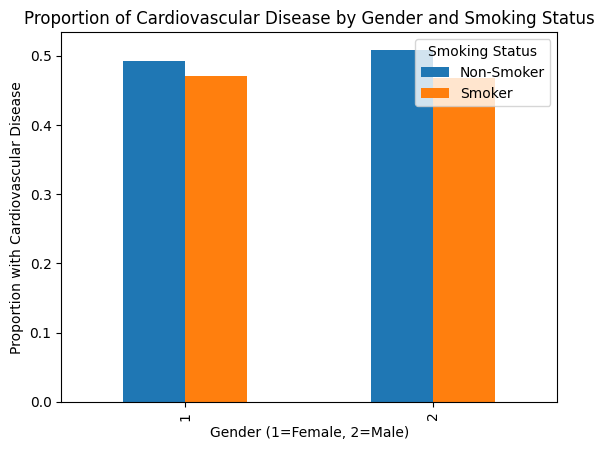

In [ ]:
# Get the proportion of cardiovascular disease by gender and smoking status
gender_smoke = med_ex_df.groupby(['gender', 'smoke'])['cardio'].mean()

# Create a DataFrame for visualization
gender_smoke_df = gender_smoke.unstack()

# Plot a stacked bar chart
gender_smoke_df.plot(kind='bar', stacked=False)

# Add labels and title
plt.title('Proportion of Cardiovascular Disease by Gender and Smoking Status')
plt.xlabel('Gender (1=Female, 2=Male)')
plt.ylabel('Proportion with Cardiovascular Disease')
plt.legend(['Non-Smoker', 'Smoker'], title='Smoking Status')

# Show the plot
plt.show()

The resuts of the analysis on gender and smoke-status show that there is little difference between a smoker and a non-smoker, for both genders, to develop a cardiovascular health decease. The mean show us that the Relative Risk we got from the code (smoker) is what we compare to the number (1) of the non-smoker. Therefore, the results being:
Relative risk for females (smokers vs non-smokers): 0.9562327001163355
Demonstrating that the smoker actually have a tiny bit lower chance of developing cardiovascular heart deseases, if you only compare gender and smoke-status,

and,

Relative risk for males (smokers vs non-smokers): 0.9206270254833326
demonstrating that the male category also have a very low difference, but as shown on the female analysis, the smoker have a littlebit lower chance of developing a cardiovascular heart desease based on smoke-status.
It is important to notice that the Relative Risk is not showing dramatic differences, and that other underlying factors, such as activity-status, alcohol consumption status, blood pressure or your cholesterol level also will affect the chances of developing a cardiovascular heart desease in a different and maybe more noticable way.

# 2) Demographic and Clinical: example: age group and glucose level
For the analysis of one demographic and one clinical factor group I chose age (or more specific age group) and glucose level.


The data given are following

for age groups - 4 groups: <40, 40-49, 50-59, 60+

for glucose level - 3 levels: 1- normal, 2- above normal, 3 -well above normal

for cardiovascular disease presence: 0 - no disease, 1 - disease




Following pseudocode was developed for this part:
    
    Extract the relevant data from the med_ex_df dataframe into a new dataframe
    Create an insight to the relationship between age and glucose level
    group the age group and glucose, count them and calculate the relative occurence of each glucose level in each age group
    Visualize and discuss the correlation between age and glucose level
    Create an insight to the impact of age and glucose level on the cardiovascular disease risk
    group age group, glucose level and cardiovascular health and calculate the relative risk of developing a disease in each group
    Visualize and discuss the patterns found






For the analysis  a new dataframe "analysis_2_df" is created with only the age group, the glucose level and the cardiovascular health risk.

In [ ]:
#extract the relevant data (age group, glucose and cardiovascular) from the table med_ex_df_1

#put age_years, gluc and cardio in a seperate table: https://blog.finxter.com/5-best-ways-to-select-multiple-columns-from-a-pandas-dataframe-in-python/
analysis_2_df=med_ex_df[['age_group', 'gluc', 'cardio']]
print(analysis_2_df)

      age_group  gluc  cardio
0         50-59     1       0
1         50-59     1       1
2         50-59     1       1
3         40-49     1       1
4         40-49     1       0
...         ...   ...     ...
69995     50-59     1       0
69996       60+     2       1
69997     50-59     1       1
69998       60+     2       1
69999     50-59     1       0

[68744 rows x 3 columns]


Firstly, I analyse the relationship between glucose level and age to see if there is a correlation that might be important for the following analysis. Therefore, the age and the glucose level are grouped and counted.

In [ ]:
# Group the data by age_group and glucose
grouped_data = analysis_2_df.groupby(['age_group', 'gluc'])

# Calculate the count for each group
age_group_gluc = grouped_data.size()
age_group_gluc

<ipython-input-26-99154774bad2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = analysis_2_df.groupby(['age_group', 'gluc'])


age_group  gluc
<40        1        1684
           2         119
           3          61
40-49      1       17246
           2        1334
           3         877
50-59      1       29381
           2        2566
           3        2956
60+        1       10134
           2        1050
           3        1336
dtype: int64

The table needs to be reshaped to get a better overview, putting glucose levels as columns and age group as rows.

In [ ]:
# Reshape the result
age_group_gluc_reshaped = age_group_gluc.unstack(1)

# Display the resulting table
(age_group_gluc_reshaped)

gluc,1,2,3
age_group,,,
<40,1684,119,61
40-49,17246,1334,877
50-59,29381,2566,2956
60+,10134,1050,1336


The table above gives the absolute numbers of the combined groups of age groups and glucose levels. It can be seen that there is a lot more data available for the age groups 40-49 and 50-59, so finding patterns is inconvenient with this table. I want the relative distributions to make conclusions, so I used the GitHub Copilot:

##Gen AI Use

    1) prompt: How can I get the relative distribution of glucose level by age group from the table age_group_gluc_reshaped

    2) Answer:
    # Calculate the relative distribution of glucose levels within each age group
    age_group_gluc_relative = age_group_gluc_reshaped.div(age_group_gluc_reshaped.sum(axis=1), axis=0)

    # Display the relative distribution
    print(age_group_gluc_relative)

    3) Effectiveness: yes
    4) Modification needed/implemented: no

The code from the AI prompt is implemented to calculate the relative distribution of glucose levels within each age group:

In [ ]:
# Calculate the relative distribution of glucose levels within each age group
age_group_gluc_relative = age_group_gluc_reshaped.div(age_group_gluc_reshaped.sum(axis=1), axis=0)

# Display the relative distribution
print(age_group_gluc_relative)

gluc              1         2         3
age_group                              
<40        0.903433  0.063841  0.032725
40-49      0.886365  0.068561  0.045074
50-59      0.841790  0.073518  0.084692
60+        0.809425  0.083866  0.106709


The table needs to be visualized for easier interpretation:

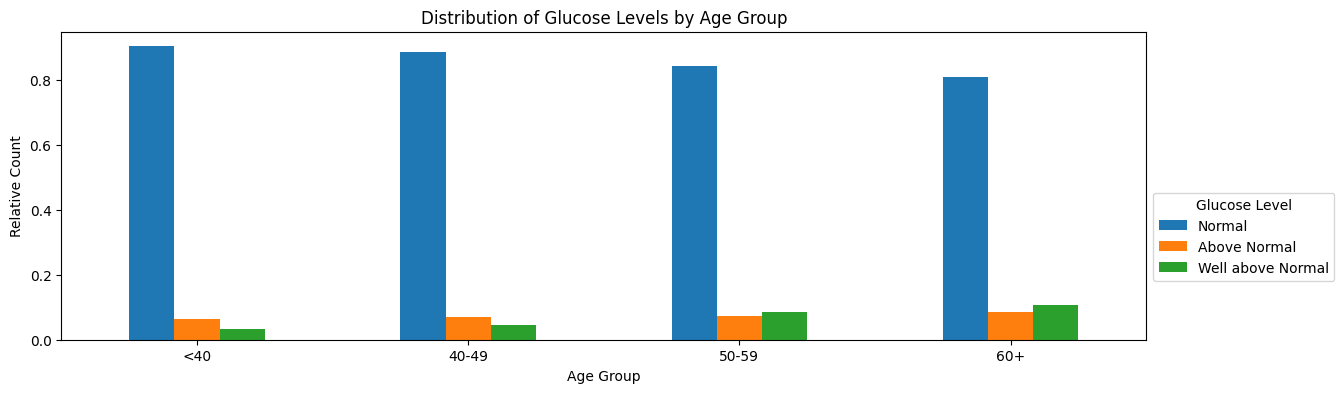

In [ ]:
# Create a grouped bar chart to visualize the distribution
ax = age_group_gluc_relative.plot(kind='bar', figsize=(14, 4))
plt.title('Distribution of Glucose Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Relative Count')
#the legend goes over the plot so needs to be removed outside: reference: https://stackoverflow.com/questions/40908983/arguments-of-bbox-to-anchor-function
plt.legend(['Normal', 'Above Normal', 'Well above Normal'], title='Glucose Level', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=0)

# Display the plot
plt.show()

The findings here are that all age groups have the highest amount of people with normal glucose level. The relative amount of people with glucose level 2 is slightly higher than glucose level 3 for the age groups under 40 and 40-49. The opposite was found for the age groups 50-59 and 60+, there, slightly more people have glucose level 3. There is a vague trend of higher glucose levels in older age groups, around 90% having glucose level 1 in the age group under 40 compared to 80% in the age group 60+. But there cannot be any significant correlation be found between higher glucose levels and with the age.

To analyze the correlation of the cardiovascular health with age and glucose,  the data of 'age_group', 'gluc' and 'cardio' is grouped, counted and displayed in a table. Each combination will be treated as a group, showing the distribution of age and glucose combinations on cardiovascular health risk.

In [ ]:
#analyze the correlation of the cardiovascular health with age and glucose

# Group the data by age_group, glucose and cardio
grouped_data = analysis_2_df.groupby(['age_group', 'gluc', 'cardio'])

# Calculate the count for each group
age_group_gluc_cardio = grouped_data.size()
age_group_gluc_cardio


<ipython-input-34-f978717f3dba>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = analysis_2_df.groupby(['age_group', 'gluc', 'cardio'])


age_group  gluc  cardio
<40        1     0          1316
                 1           368
           2     0            70
                 1            49
           3     0            39
                 1            22
40-49      1     0         11060
                 1          6186
           2     0           670
                 1           664
           3     0           432
                 1           445
50-59      1     0         14795
                 1         14586
           2     0          1050
                 1          1516
           3     0          1129
                 1          1827
60+        1     0          3476
                 1          6658
           2     0           296
                 1           754
           3     0           395
                 1           941
dtype: int64

The table is not optimal since the age groups, the glucose levels and the cardiovascular health risk are all in rows, making the table very long and unhandy. In the following the table is going to be reshaped.

In [ ]:
# Reshape the result
age_group_gluc_cardio_reshaped = age_group_gluc_cardio.unstack(1)

# Display the resulting table
(age_group_gluc_cardio_reshaped)

gluc                  1     2     3
age_group cardio                   
<40       0        1316    70    39
          1         368    49    22
40-49     0       11060   670   432
          1        6186   664   445
50-59     0       14795  1050  1129
          1       14586  1516  1827
60+       0        3476   296   395
          1        6658   754   941

In the table above, the data got split into groups of different ages and glucose levels. It shows the number of people of each group having no cariovascular disease presence (0) or having a cardiovascular disease (1).

For better understanding, the data is put int a stacked bar chart, by age group and no disease (0) or disease (1) presence.

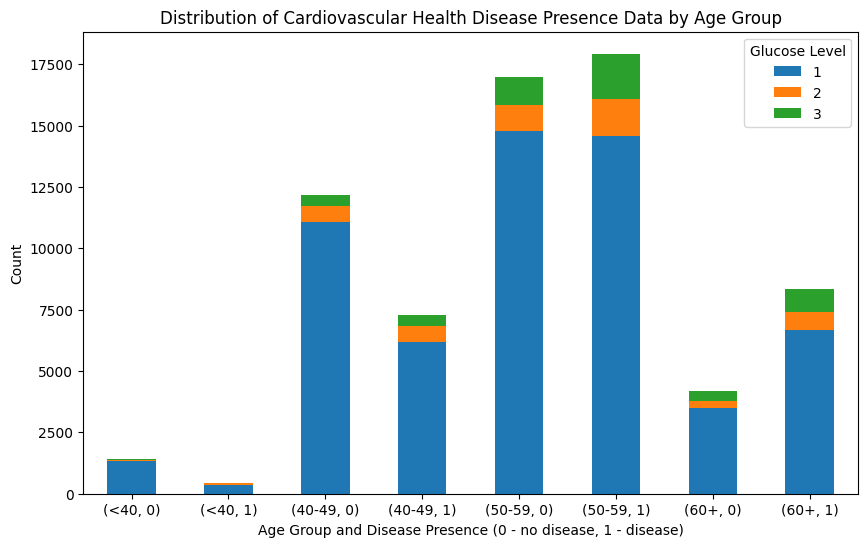

In [ ]:
# Create a stacked bar chart
age_group_gluc_cardio_reshaped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Cardiovascular Health Disease Presence Data by Age Group')
plt.xlabel('Age Group and Disease Presence (0 - no disease, 1 - disease)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Glucose Level')

# Display the plot
plt.show()

As discussed earlier, it is visible that most data is available from the age group 50-59 and the least data from under 40. Also it is noticable that most people from the database have the glucose level 1 which means normal.
 Other trends to observe from this plot are:
- In the group of under 40 year olds, more people have not developed a cardiovascular health disease.
- In the age group from 40-49, in general more data is available. In this age group, also more people have no disease. Further, almost the same amount of people from glucose level 2 and 3 are present in both groups, no disease and disease.
- For the group of 50-59 year old, slightly more people have developed a disease.
- In the group of over 60 years old, less data is available again with almost double the amount of people having developed a disease compared to no disease.

 Since it is in absolut numbers and the amount of data varies greatly within the age groups, it is hard to find patterns from this data yet. This part will not be further looked at in the business report, since it gave not much insight.


Since I didn't know how to further proceed for a good insight, I asked the GenAI assistant from GitHub:

###Use of Gen AI

    1) prompt: How can I make an analysis of the development of cardiovascular health risk based on the tables above

    2) Answer:
    # Assuming 'med_ex_df' is your DataFrame and the necessary columns exist

    # ... (Your existing code for data preprocessing) ...


    # 2) Monika: Demographic and Clinical: example: age group and glucose level

    # ... (Your existing code for creating 'analysis_2_df') ...

    # More detailed analysis of age group and glucose level:

    # Pivot table for better visualization
    pivot_table = pd.pivot_table(analysis_2_df, values='cardio', index='age_group', columns='gluc', aggfunc='mean')

    # Plotting the pivot table
    pivot_table.plot(kind='bar', figsize=(10, 6))
    plt.title('Cardiovascular Disease Risk by Age Group and Glucose Level')
    plt.xlabel('Age Group')
    plt.ylabel('Mean Cardiovascular Disease Risk')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.legend(title='Glucose Level')
    plt.show()

    # Statistical tests (e.g., chi-squared test or ANOVA) could be applied to
    # determine if there are statistically significant associations between
    # age group, glucose levels, and cardiovascular risk.  

    # Example using chi-squared test (requires contingency table):
    # contingency_table = pd.crosstab(analysis_2_df['age_group'], analysis_2_df['gluc'])
    # from scipy.stats import chi2_contingency
    # chi2, p, dof, expected = chi2_contingency(contingency_table)
    # print(f"Chi-squared test results: Chi2 = {chi2}, p-value = {p}")


    # Further analysis: Consider interactions and subgroups for more detailed insights.
    # For instance, analyzing glucose levels within each age group, or exploring
    # the relationship between age, glucose levels and other risk factors,
    # such as blood pressure or cholesterol.


    3) Effectiveness: yes
    4) Modification needed/implemented: I only need the middle part of the suggested code for my analysis.

        
    # Pivot table for better visualization
    pivot_table = pd.pivot_table(analysis_2_df, values='cardio', index='age_group', columns='gluc', aggfunc='mean')

    # Plotting the pivot table
    pivot_table.plot(kind='bar', figsize=(10, 6))
    plt.title('Cardiovascular Disease Risk by Age Group and Glucose Level')
    plt.xlabel('Age Group')
    plt.ylabel('Mean Cardiovascular Disease Risk')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.legend(title='Glucose Level')
    plt.show()

As suggested by the AI tool, the table analysis_2_df dataframe is used for a better analysis of the data. From the dataframe, the cardio values are aggregated and the mean of the cardio values for each combination of 'age_group' and 'gluc' are calculated. The new table will have age groups as rows and glucose levels as columns.

In [ ]:
# Pivot table for better visualization
pivot_table = pd.pivot_table(analysis_2_df, values='cardio', index='age_group', columns='gluc', aggfunc='mean')
pivot_table

<ipython-input-37-1a7567d98e2f>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(analysis_2_df, values='cardio', index='age_group', columns='gluc', aggfunc='mean')


gluc,1,2,3
age_group,,,
<40,0.218527,0.411765,0.360656
40-49,0.358692,0.497751,0.507412
50-59,0.496443,0.590803,0.618065
60+,0.656996,0.718095,0.704341


The table now shows the correlation of age groups and glucose levels with the development of cardiovascular diseases. The higher the number, the more likely people from his combination group are to develop a cardiovascular health disease. In a next step, this table is converted into a grouped bar chart for better insights.

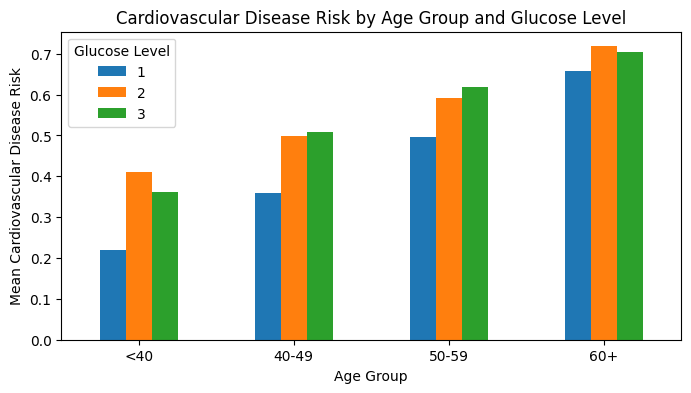

In [ ]:
# Plotting a grouped bar chart
pivot_table.plot(kind='bar', figsize=(8, 4))
plt.title('Cardiovascular Disease Risk by Age Group and Glucose Level')
plt.xlabel('Age Group')
plt.ylabel('Mean Cardiovascular Disease Risk')
plt.xticks(rotation=0)
plt.legend(title='Glucose Level')
plt.show()


The above graph enables a better analysis of the relationship between age and glucose level with the presence of cardiovascular disease.
First of all, it is noticable that the overall disease presence is increasing with the age group, independently from the glucose level.
The glucose level plays also a role in the development of cardiovascular health, but the influence of the glucose level is more dominant in younger age groups and has barely impact in the age group of 60+.

Dominantly in the youngest age group (<40) people with a normal glucose level are the least likely to develop a disease (approx. 0.2). The risk almost doubles with hightened glucose levels, while in this age group, the glucose level 2 shows a higher risk than level 3. With the increasing age groups the difference of the disease presence between different glucose levels decreases. For the age groups of 40-49 and 50-59, the presence of a cardiovascular health disease increases with increasing glucose level while the  difference is higher between the glucose levels 1 and 2 than between level 2 and 3. In the last age group of over 60 years, the disease risk is very closely in all three glucose levels, with the level 1 still being the one with the smallest risk in this age group.

All in all, it seems like while the dominant factor for developing a cardiovascular health disease in these two factor groups is the age. However, it is possible to influence the disease risk by ensuring a normal glucose level (1) in all age groups. While a normal glucose level lowers the risk for all age groups, there is no clear pattern for glucose level 2 and 3, above and well above glucose levels.


# 3) Demographic + Clinical + Lifestyle – by Iman


## Example 3: Age, blood pressure and physical activity.

The following algorithm was developed for this part:

    *Pre-processing*
    1) Categorise the systolic and diastolic blood pressure into appropriate ranges.

    *Analysis*
    2) Extract the relevant data from the med_ex_df dataframe into a new dataframe
    3) Get insight of the relationship between blood pressure and cardiovascular disease
    4) Get insight of the relationship between blood pressure and age
    5) See the combined relationship between blood pressure, age and cardiovascular disease
    6) Gain insight on the relationship between physical activity and blood pressure.
    7) If there is a clear trend with physical activity and blood pressure, gain insight between physical activity and age.
    If not, see what effect physical activity has on blood pressure, age and cardiovascular disease.



### *Pre - processing*



      1) Categorise the systolic and diastolic blood pressure into appropriate ranges

Before beginning my analysis, I needed to define the systolic (ap_hi) and diastolic (ap_lo) blood pressure values into blood pressure categories. As mentioned earlier I used the following links as a reference for the categories:

  https://www.medicalnewstoday.com/articles/327077#healthy-ranges
  
  https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

From the referenced links, I understood the following categories:

Low blood Pressure:
    
      ap_hi less than 90, ap_lo less than 60

Normal blood pressure:

      ap_hi less than 120, ap_lo less than 80

Elevated blood pressure:

      ap_hi more than 120 but less than 130,
      ap_lo less than 80

High blood pressure stage 1:

      ap_hi more than 130 but less than 140,
      ap_lo more than 80 but less than 90

High blood pressure stage 2:

      ap_hi more than 140 but less than 180,
      ap_lo more than 90 but less than 120
    
Hypertensive crisis:

      ap_hi more than 180
      ap_lo more than 120




Now I can write out my Pseudocode:

      Convert the blood pressure value into categories for better comprehension in the analysis

      Define Low blood pressure

      Define Normal blood pressure

      Define High blood pressure stage 1

      Define High Blood pressure stage 2

      Define Hypertensive crisis
   


#### Use of Gen AI
    Step 1: Gen AI prompt
    if med_ex_df['ap_hi'].loc < 120 and med_ex_df['ap_lo'].loc < 80:
      med_ex_df['blood_pressure_category']= 'normal'
    elif 120 <= med_ex_df['ap_hi'].loc < 130 and med_ex_df['ap_lo'].loc < 80:
      med_ex_df['blood_pressure_category']= 'elevated'
    elif 130 <= med_ex_df['ap_hi'].loc < 140 or 80 <= med_ex_df['ap_lo'].loc < 90:
      med_ex_df['blood_pressure_category']= 'High blood pressure stage 1'
    elif 140 <= med_ex_df['ap_hi'].loc < 180 or 90 <= med_ex_df['ap_lo'].loc < 120:
      med_ex_df['blood_pressure_category']= 'High blood pressure stage 2'
    elif 180 <= med_ex_df['ap_hi'].loc or 120 <= med_ex_df['ap_lo'].loc :
      med_ex_df['blood_pressure_category']= 'Hypertensive crisis'
    med_ex_df.head(10)
    How can I correct this code to let it work properly on the dataframe?

Step 2: Gen AI response

    import pandas as pd

    # Assuming med_ex_df is your DataFrame

    # Initialize the column to avoid SettingWithCopyWarning
    med_ex_df['blood_pressure_category'] = ''

    # Apply conditions to categorize blood pressure

    for index, row in med_ex_df.iterrows():
        if row['ap_hi'] < 120 and row['ap_lo'] < 80:
            med_ex_df.at[index, 'blood_pressure_category'] = 'normal'
        elif 120 <= row['ap_hi'] < 130 and row['ap_lo'] < 80:
            med_ex_df.at[index, 'blood_pressure_category'] = 'elevated'
        elif (130 <= row['ap_hi'] < 140) or (80 <= row['ap_lo'] < 90):
            med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 1'
        elif (140 <= row['ap_hi'] < 180) or (90 <= row['ap_lo'] < 120):
            med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 2'
        elif row['ap_hi'] >= 180 or row['ap_lo'] >= 120:
            med_ex_df.at[index, 'blood_pressure_category'] = 'Hypertensive crisis'

    # Display the first 10 rows to verify
    print(med_ex_df.head(10))

This code iterates through each row in med_ex_df and assigns the appropriate blood pressure category based on the conditions specified. It uses .at[index, 'column_name'] to set values in a way that avoids potential issues with chained indexing. Adjust med_ex_df and column names (ap_hi and ap_lo) as per your actual DataFrame structure.


Step 3: Gen AI Response Effectiveness: yes

Step 4: Modification Needed/Implemented

Yes, the part before "Apply conditions to categorize blood pressure" is not needed and will not be used in the following. Further, we realized, that we need to add the Category "Low" in the beginning and added this one as well.

In [ ]:
#from gen ai usage
#convert the blood pressure value into categories for better comprehension in the analysis

for index, row in med_ex_df.iterrows():

  # Low blood pressure (both systolic and diastolic are low)
    if row['ap_hi'] < 90 and row['ap_lo'] < 60:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Low'

  # Normal blood pressure
    elif 90 <= row['ap_hi'] < 120 and 60 <= row['ap_lo'] < 80:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Normal'

  #Elevated blood pressure
    elif 120 <= row['ap_hi'] < 130 and row['ap_lo'] < 80:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Elevated'

  #High blood pressure stage 1
    elif (130 <= row['ap_hi'] < 140) or (80 <= row['ap_lo'] < 90):
        med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 1'

  #High blood pressure stage 2
    elif (140 <= row['ap_hi'] < 180) or (90 <= row['ap_lo'] < 120):
        med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 2'

  #High blood pressure stage 3
    elif row['ap_hi'] >= 180 or row['ap_lo'] >= 120:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Hypertensive crisis'

#display the first 10 rows to check
med_ex_df.head(10)

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
0,0,18393,2,110,80,1,1,0,0,1,0,50,50-59,High blood pressure stage 1
1,1,20228,1,140,90,3,1,0,0,1,1,55,50-59,High blood pressure stage 2
2,2,18857,1,130,70,3,1,0,0,0,1,51,50-59,High blood pressure stage 1
3,3,17623,2,150,100,1,1,0,0,1,1,48,40-49,High blood pressure stage 2
4,4,17474,1,100,60,1,1,0,0,0,0,47,40-49,Normal
5,8,21914,1,120,80,2,2,0,0,0,0,59,50-59,High blood pressure stage 1
6,9,22113,1,130,80,3,1,0,0,1,0,60,60+,High blood pressure stage 1
7,12,22584,2,130,90,3,3,0,0,1,1,61,60+,High blood pressure stage 1
8,13,17668,1,110,70,1,1,0,0,1,0,48,40-49,Normal
9,14,19834,1,110,60,1,1,0,0,0,0,54,50-59,Normal


Now we will check for null values.

In [ ]:
med_ex_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68744 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       68744 non-null  int64   
 1   age                      68744 non-null  int64   
 2   gender                   68744 non-null  int64   
 3   ap_hi                    68744 non-null  int64   
 4   ap_lo                    68744 non-null  int64   
 5   cholesterol              68744 non-null  int64   
 6   gluc                     68744 non-null  int64   
 7   smoke                    68744 non-null  int64   
 8   alco                     68744 non-null  int64   
 9   active                   68744 non-null  int64   
 10  cardio                   68744 non-null  int64   
 11  age_year                 68744 non-null  int64   
 12  age_group                68744 non-null  category
 13  blood_pressure_category  68620 non-null  object  
dtypes: category

There is about 124 null values. I will also check each blood pressure category to ensure the ranges specified ranges are adhered to.

Now we will check if the max and min values of each category correctly meet the specified ranges. Starting with the "Low" blood pressure categories.

In [ ]:
med_ex_df[med_ex_df['blood_pressure_category'] == 'Low']

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
383,543,19517,1,80,50,1,1,0,0,1,0,53,50-59,Low
4347,6137,21654,1,80,50,1,1,0,0,1,0,59,50-59,Low
7076,10083,21235,1,70,50,2,2,0,1,0,0,58,50-59,Low
11793,16841,14662,1,80,50,1,1,0,0,1,0,40,40-49,Low
11951,17067,15795,2,70,40,1,1,1,0,1,0,43,40-49,Low
13755,19634,15892,1,60,40,1,3,0,0,0,0,43,40-49,Low
16629,23761,14506,1,70,50,1,1,0,0,1,0,39,<40,Low
28026,40071,15858,2,80,50,1,1,1,1,1,0,43,40-49,Low
41727,59595,14568,1,80,50,1,1,0,0,0,0,39,<40,Low
43128,61612,19122,1,80,40,2,2,0,0,0,0,52,50-59,Low


In [ ]:
low_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'Low']
low_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,40054.857143,16841.071429,1.214286,75.714286,47.142857,1.357143,1.428571,0.142857,0.142857,0.642857,0.071429,45.642857
std,30597.926835,2576.748770,0.425815,6.462062,4.688072,0.497245,0.646206,0.363137,0.363137,0.497245,0.267261,7.164089
min,543.000000,14506.000000,1.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,16897.500000,14689.750000,1.000000,70.000000,42.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000
50%,31916.000000,15826.500000,1.000000,80.000000,50.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,43.000000
75%,61719.250000,18888.000000,1.000000,80.000000,50.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,51.250000
max,93753.000000,21654.000000,2.000000,80.000000,50.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,59.000000


In [ ]:
low_bp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 383 to 65685
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       14 non-null     int64   
 1   age                      14 non-null     int64   
 2   gender                   14 non-null     int64   
 3   ap_hi                    14 non-null     int64   
 4   ap_lo                    14 non-null     int64   
 5   cholesterol              14 non-null     int64   
 6   gluc                     14 non-null     int64   
 7   smoke                    14 non-null     int64   
 8   alco                     14 non-null     int64   
 9   active                   14 non-null     int64   
 10  cardio                   14 non-null     int64   
 11  age_year                 14 non-null     int64   
 12  age_group                14 non-null     category
 13  blood_pressure_category  14 non-null     object  
dtypes: category(

There are only 14 rows of "Low" which is a very small number and could be inaccurate. Next, I will check the "Normal" categories.

In [ ]:
med_ex_df[med_ex_df['blood_pressure_category'] == 'Normal']

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
4,4,17474,1,100,60,1,1,0,0,0,0,47,40-49,Normal
8,13,17668,1,110,70,1,1,0,0,1,0,48,40-49,Normal
9,14,19834,1,110,60,1,1,0,0,0,0,54,50-59,Normal
13,21,19809,1,110,70,1,1,0,0,1,0,54,50-59,Normal
17,27,16747,1,110,70,1,3,0,0,1,0,45,40-49,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69953,99936,17373,2,110,70,1,1,1,1,1,1,47,40-49,Normal
69961,99948,16598,1,110,75,1,1,0,0,1,0,45,40-49,Normal
69978,99967,18800,1,90,60,1,1,0,0,1,1,51,50-59,Normal
69988,99981,21978,1,110,70,1,1,0,0,1,0,60,60+,Normal


In [ ]:
normal_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'Normal']
normal_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000,9417.000000
mean,49763.190294,18418.141977,1.254858,105.842200,67.888181,1.225125,1.155782,0.078475,0.045344,0.816714,0.221620,49.925135
std,28802.482817,2523.665623,0.435805,6.726903,4.264204,0.516172,0.470956,0.268932,0.208068,0.386921,0.415359,6.917927
min,4.000000,10798.000000,1.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,24949.000000,16139.000000,1.000000,100.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,44.000000
50%,49565.000000,18320.000000,1.000000,110.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,50.000000
75%,74774.000000,20405.000000,2.000000,110.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,55.000000
max,99986.000000,23673.000000,2.000000,119.000000,79.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


The "Normal" blood pressures appear to be following the specified range.
Next I will check "Elevated".

In [ ]:
med_ex_df[med_ex_df['blood_pressure_category'] == 'Elevated']

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
19,29,21755,2,120,70,1,1,1,0,1,0,59,50-59,Elevated
43,58,20556,2,120,60,1,1,0,0,1,1,56,50-59,Elevated
49,64,16045,1,120,70,1,1,0,0,1,0,43,40-49,Elevated
80,109,16591,1,120,70,1,1,0,0,1,0,45,40-49,Elevated
81,111,19029,1,120,70,1,1,0,0,1,0,52,50-59,Elevated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69769,99657,18155,2,128,78,1,1,1,0,1,0,49,40-49,Elevated
69793,99685,18105,1,120,70,2,2,0,0,0,0,49,40-49,Elevated
69901,99845,19621,1,120,70,1,1,0,0,1,1,53,50-59,Elevated
69977,99965,16843,1,120,79,1,1,0,0,1,0,46,40-49,Elevated


In [ ]:
elevated_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'Elevated']
elevated_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000
mean,50804.237375,19207.912190,1.355098,120.206176,69.336443,1.227404,1.177227,0.087810,0.055967,0.793824,0.322933,52.093921
std,28376.725164,2497.369759,0.478620,1.031805,4.850735,0.554676,0.527661,0.283063,0.229894,0.404623,0.467673,6.835787
min,29.000000,14309.000000,1.000000,120.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,26556.000000,17399.000000,1.000000,120.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,47.000000
50%,50834.000000,19541.000000,1.000000,120.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,75190.000000,21182.000000,2.000000,120.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,57.000000
max,99985.000000,23666.000000,2.000000,129.000000,79.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


The elevated category seems to meet the range.

In [ ]:
med_ex_df[med_ex_df['blood_pressure_category'] == 'High blood pressure stage 1']

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
0,0,18393,2,110,80,1,1,0,0,1,0,50,50-59,High blood pressure stage 1
2,2,18857,1,130,70,3,1,0,0,0,1,51,50-59,High blood pressure stage 1
5,8,21914,1,120,80,2,2,0,0,0,0,59,50-59,High blood pressure stage 1
6,9,22113,1,130,80,3,1,0,0,1,0,60,60+,High blood pressure stage 1
7,12,22584,2,130,90,3,3,0,0,1,1,61,60+,High blood pressure stage 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,130,90,1,1,0,0,1,1,53,50-59,High blood pressure stage 1
69994,99992,21074,1,150,80,1,1,0,0,1,1,57,50-59,High blood pressure stage 1
69995,99993,19240,2,120,80,1,1,1,0,1,0,52,50-59,High blood pressure stage 1
69998,99998,22431,1,135,80,1,2,0,0,0,1,61,60+,High blood pressure stage 1


In [ ]:
stage1_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'High blood pressure stage 1']
stage1_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,39762.000000,39762.000000,39762.000000,39762.000000,39762.000000,39762.000000,39762.000000,39762.000000,39762.000000,39762.000000,39762.000000,39762.000000
mean,49978.003068,19520.881042,1.359187,123.934561,80.850611,1.332679,1.218274,0.086037,0.050023,0.799759,0.448544,52.945979
std,28921.903682,2430.226057,0.479768,9.259657,3.685338,0.663865,0.569034,0.280422,0.217994,0.400186,0.497351,6.660515
min,0.000000,10859.000000,1.000000,90.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,24846.250000,18027.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,49.000000
50%,50017.500000,19734.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74993.750000,21328.000000,2.000000,130.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,200.000000,121.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


Something went wrong here because the max for "stage 1" is 200 for ap_hi and 190 for ap_lo.

In [ ]:
stage2_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'High blood pressure stage 2']
stage2_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000,16107.000000
mean,49915.784007,19991.221457,1.376979,146.521637,92.499596,1.549761,1.294158,0.097721,0.065499,0.806357,0.800770,54.232818
std,28787.640220,2328.801369,0.484645,14.894745,7.170126,0.775609,0.630286,0.296947,0.247413,0.395164,0.399434,6.385884
min,1.000000,14275.000000,1.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,25019.000000,18326.500000,1.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000
50%,49977.000000,20325.000000,1.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,55.000000
75%,74600.500000,21875.000000,2.000000,150.000000,100.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000
max,99996.000000,23690.000000,2.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


Again, the max values for stage 2 are too high at 240 and 150.

In [ ]:
med_ex_df[med_ex_df['blood_pressure_category'] == 'Hypertensive crisis']

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
474,681,19099,1,120,150,2,1,0,0,1,0,52,50-59,Hypertensive crisis
1270,1785,19022,2,180,120,2,1,0,1,1,1,52,50-59,Hypertensive crisis
1328,1863,21063,2,220,120,3,3,0,0,1,0,57,50-59,Hypertensive crisis
2384,3356,23361,1,90,150,1,1,0,0,0,1,63,60+,Hypertensive crisis
2990,4214,21957,2,80,140,3,3,0,0,1,1,60,60+,Hypertensive crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68448,97768,15370,2,200,140,1,2,1,0,1,1,42,40-49,Hypertensive crisis
68460,97783,21791,2,180,120,3,1,0,0,0,0,59,50-59,Hypertensive crisis
68565,97946,19437,1,180,120,1,1,0,0,1,1,53,50-59,Hypertensive crisis
69329,99019,19818,1,240,130,1,1,0,0,0,1,54,50-59,Hypertensive crisis


In [ ]:
hypertensive_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'Hypertensive crisis']
hypertensive_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,49785.199052,19717.109005,1.417062,158.109005,120.791469,1.568720,1.350711,0.137441,0.146919,0.838863,0.767773,53.469194
std,27421.795925,2238.228101,0.494246,52.513331,18.760245,0.779968,0.676290,0.345131,0.354867,0.368532,0.423258,6.139082
min,681.000000,14375.000000,1.000000,70.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,26471.500000,18330.000000,1.000000,90.000000,120.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000
50%,50943.000000,19740.000000,1.000000,180.000000,120.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,54.000000
75%,70653.000000,21202.000000,2.000000,200.000000,130.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99139.000000,23614.000000,2.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


Hypertensive crisis appears to be normal.

There appears to be a big issue with the ranges especially for stage 1 and stage 2. There is also a very small amount of for "Low". I will try to modify the code.

In [ ]:
for index, row in med_ex_df.iterrows():

    # Low blood pressure (both systolic and diastolic are low)
    if row['ap_hi'] < 90 and row['ap_lo'] < 60:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Low'

    # Normal blood pressure
    elif 90 <= row['ap_hi'] < 120 and 60 <= row['ap_lo'] < 80:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Normal'

    # Elevated blood pressure
    elif 120 <= row['ap_hi'] < 130 and row['ap_lo'] < 80:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Elevated'

    # High blood pressure stage 1
    elif (130 <= row['ap_hi'] < 140 and row['ap_lo'] < 90) or (row['ap_hi'] < 140 and 80 <= row['ap_lo'] < 90):
        med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 1'

    # High blood pressure stage 2
    elif (140 <= row['ap_hi'] < 180 and row['ap_lo'] < 120) or (row['ap_hi'] < 180 and 90 <= row['ap_lo'] < 120):
        med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 2'

    # Hypertensive crisis
    elif row['ap_hi'] >= 180 or row['ap_lo'] >= 120:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Hypertensive crisis'

    # Catch anything that doesn't fit
    else:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Unknown'


In this code, I modified the blood pressure stage 1 and 2 to account for different instances. I also added an "Unknown" in case there are still values that do not meet the criteria, this way there will be no nulls.

In [ ]:
#check for missing values in each row

null_records = med_ex_df.isnull().any(axis =1)

med_ex_df[null_records]

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category


I will check the categories for "Low", "Stage 1", "Stage 2", as well as the "Unknown" values.

In [ ]:
low_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'Low']

low_bp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 383 to 65685
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       14 non-null     int64   
 1   age                      14 non-null     int64   
 2   gender                   14 non-null     int64   
 3   ap_hi                    14 non-null     int64   
 4   ap_lo                    14 non-null     int64   
 5   cholesterol              14 non-null     int64   
 6   gluc                     14 non-null     int64   
 7   smoke                    14 non-null     int64   
 8   alco                     14 non-null     int64   
 9   active                   14 non-null     int64   
 10  cardio                   14 non-null     int64   
 11  age_year                 14 non-null     int64   
 12  age_group                14 non-null     category
 13  blood_pressure_category  14 non-null     object  
dtypes: category(

There are still only 14 values.

In [ ]:
stage1_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'High blood pressure stage 1']
stage1_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,32454.000000,32454.000000,32454.000000,32454.000000,32454.000000,32454.000000,32454.000000,32454.000000,32454.000000,32454.000000,32454.000000,32454.000000
mean,49977.067172,19413.848000,1.358600,120.814291,79.807327,1.284310,1.204073,0.083010,0.046928,0.799193,0.384606,52.653325
std,28893.017345,2440.633736,0.479597,5.516431,1.899521,0.622399,0.554308,0.275901,0.211488,0.400610,0.486510,6.688841
min,0.000000,10859.000000,1.000000,90.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,24922.250000,17667.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50056.000000,19679.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74916.250000,21257.750000,2.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,139.000000,89.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [ ]:
stage2_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'High blood pressure stage 2']
stage2_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000
mean,49983.126688,19979.136474,1.370500,142.389408,89.918744,1.544480,1.286410,0.097463,0.064429,0.806137,0.775938,54.199132
std,28890.442261,2331.480341,0.482949,12.079508,7.050201,0.778186,0.626147,0.296593,0.245521,0.395331,0.416973,6.392720
min,1.000000,14275.000000,1.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,24878.500000,18323.500000,1.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000
50%,50050.000000,20329.000000,1.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,55.000000
75%,74858.000000,21869.000000,2.000000,150.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000
max,99995.000000,23690.000000,2.000000,179.000000,119.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


The maximum and minimum ap_hi and ap_lo values for Stage 1 and Stage 2 appear to meet the range now which is good.

Now, I will take a closer look at the "Unknown" values.

In [ ]:
uncategorised_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'Unknown']

uncategorised_bp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 209 to 69265
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       124 non-null    int64   
 1   age                      124 non-null    int64   
 2   gender                   124 non-null    int64   
 3   ap_hi                    124 non-null    int64   
 4   ap_lo                    124 non-null    int64   
 5   cholesterol              124 non-null    int64   
 6   gluc                     124 non-null    int64   
 7   smoke                    124 non-null    int64   
 8   alco                     124 non-null    int64   
 9   active                   124 non-null    int64   
 10  cardio                   124 non-null    int64   
 11  age_year                 124 non-null    int64   
 12  age_group                124 non-null    category
 13  blood_pressure_category  124 non-null    object  
dtypes: category

In [ ]:
uncategorised_bp.head(10)

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
209,288,18169,2,80,70,1,1,0,0,1,0,49,40-49,Unknown
2183,3082,22704,2,110,50,1,1,1,0,1,1,62,60+,Unknown
2921,4116,20258,1,110,59,1,1,0,0,1,1,55,50-59,Unknown
3267,4603,20335,1,100,50,1,1,0,0,1,1,55,50-59,Unknown
3834,5428,19644,2,80,60,1,1,1,0,1,0,53,50-59,Unknown
3858,5462,20927,2,80,60,1,1,1,0,0,0,57,50-59,Unknown
4616,6534,14743,1,80,60,1,1,0,0,1,0,40,40-49,Unknown
4983,7056,18183,1,85,60,2,1,0,0,1,0,49,40-49,Unknown
5712,8124,18190,1,85,60,2,1,0,0,1,1,49,40-49,Unknown
7374,10510,18291,2,80,60,2,2,1,1,1,0,50,50-59,Unknown


In [ ]:
uncategorised_bp.tail(10)

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
64444,91992,16192,1,80,60,1,1,0,0,1,0,44,40-49,Unknown
65010,92788,15611,1,95,49,1,1,0,0,1,0,42,40-49,Unknown
66123,94393,15368,1,80,60,1,1,0,0,1,0,42,40-49,Unknown
66354,94728,15267,2,100,50,1,1,1,1,1,0,41,40-49,Unknown
66464,94885,22516,2,90,59,2,1,1,0,0,0,61,60+,Unknown
67600,96520,21993,1,115,49,1,1,0,0,1,1,60,60+,Unknown
68021,97151,21701,1,85,66,1,1,0,1,1,0,59,50-59,Unknown
68370,97651,19066,2,100,50,2,1,1,0,1,0,52,50-59,Unknown
68665,98104,16853,2,80,60,1,1,1,0,0,0,46,40-49,Unknown
69265,98932,15207,1,80,60,2,1,0,0,1,0,41,40-49,Unknown


In [ ]:
uncategorised_bp.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,52604.612903,18609.927419,1.217742,89.895161,56.838710,1.282258,1.112903,0.120968,0.040323,0.741935,0.233871,50.419355
std,27981.925935,2536.426416,0.414385,11.070960,5.561755,0.549360,0.365364,0.327413,0.197513,0.439345,0.425008,6.973931
min,288.000000,14390.000000,1.000000,80.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,29516.000000,16539.250000,1.000000,80.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,44.750000
50%,53814.000000,18905.000000,1.000000,90.000000,59.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,51.000000
75%,77905.250000,20673.750000,1.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,56.250000
max,98932.000000,23483.000000,2.000000,118.000000,70.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


It appears that majority if not all the blood pressures within the "unknown" category are ones with systolic and diastolic blood pressures that are almost on the borderline of being normal between too high and too low. For example ID 96520 has a normal systolic value while the diastolic value is very low. Or 69265 has a low systolic value however the diastolic value is just above the "low" threshold. For these values, as majority sit on the borderline of low and Normal.

After having a closer look at the referenced link:
https://www.medicalnewstoday.com/articles/327077#healthy-ranges
I realised that "Low" blood pressure includes values 90 and 60 as part of having low blood pressure. My original code excluded values 90 and 60, only values below 90 and 60 were included. I modified the code to include 90 and 60 for Low blood pressure.

In [ ]:
for index, row in med_ex_df.iterrows():

    # Low blood pressure (both systolic and diastolic are low)
    if row['ap_hi'] <= 90 and row['ap_lo'] <= 60:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Low'

    # Normal blood pressure
    elif 90 <= row['ap_hi'] < 120 and 60 <= row['ap_lo'] < 80:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Normal'

    # Elevated blood pressure
    elif 120 <= row['ap_hi'] < 130 and row['ap_lo'] < 80:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Elevated'

    # High blood pressure stage 1
    elif (130 <= row['ap_hi'] < 140 and row['ap_lo'] < 90) or (row['ap_hi'] < 140 and 80 <= row['ap_lo'] < 90):
        med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 1'

    # High blood pressure stage 2
    elif (140 <= row['ap_hi'] < 180 and row['ap_lo'] < 120) or (row['ap_hi'] < 180 and 90 <= row['ap_lo'] < 120):
        med_ex_df.at[index, 'blood_pressure_category'] = 'High blood pressure stage 2'

    # Hypertensive crisis
    elif row['ap_hi'] >= 180 or row['ap_lo'] >= 120:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Hypertensive crisis'

    # Catch for anything that doesn't fit
    else:
        med_ex_df.at[index, 'blood_pressure_category'] = 'Unknown'


In [ ]:
low_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'Low']
low_bp

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
56,71,17407,1,90,60,1,2,0,0,1,0,47,40-49,Low
188,255,22527,1,90,60,1,1,0,0,1,0,61,60+,Low
353,491,16021,1,90,60,1,1,0,0,1,0,43,40-49,Low
383,543,19517,1,80,50,1,1,0,0,1,0,53,50-59,Low
388,551,20943,2,90,60,1,1,1,0,0,0,57,50-59,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69854,99772,16519,2,90,60,1,1,0,0,1,0,45,40-49,Low
69863,99783,21146,1,90,60,3,1,0,0,1,1,57,50-59,Low
69877,99806,20052,1,90,60,2,1,0,0,1,0,54,50-59,Low
69937,99908,14489,1,90,60,1,1,0,0,1,0,39,<40,Low


Now there are a lot more rows included in the "Low" blood pressure category.

In [ ]:
normal_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'Normal']
normal_bp

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_group,blood_pressure_category
4,4,17474,1,100,60,1,1,0,0,0,0,47,40-49,Normal
8,13,17668,1,110,70,1,1,0,0,1,0,48,40-49,Normal
9,14,19834,1,110,60,1,1,0,0,0,0,54,50-59,Normal
13,21,19809,1,110,70,1,1,0,0,1,0,54,50-59,Normal
17,27,16747,1,110,70,1,3,0,0,1,0,45,40-49,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69951,99934,15254,1,110,70,1,1,0,0,1,0,41,40-49,Normal
69953,99936,17373,2,110,70,1,1,1,1,1,1,47,40-49,Normal
69961,99948,16598,1,110,75,1,1,0,0,1,0,45,40-49,Normal
69988,99981,21978,1,110,70,1,1,0,0,1,0,60,60+,Normal


There are slightly less rows in the "Normal" blood pressure category as rows were incorrectly categorised as "Normal" instead of "Low".

In [ ]:
uncategorised_bp = med_ex_df[med_ex_df['blood_pressure_category'] == 'Unknown']

uncategorised_bp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 209 to 68370
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       43 non-null     int64   
 1   age                      43 non-null     int64   
 2   gender                   43 non-null     int64   
 3   ap_hi                    43 non-null     int64   
 4   ap_lo                    43 non-null     int64   
 5   cholesterol              43 non-null     int64   
 6   gluc                     43 non-null     int64   
 7   smoke                    43 non-null     int64   
 8   alco                     43 non-null     int64   
 9   active                   43 non-null     int64   
 10  cardio                   43 non-null     int64   
 11  age_year                 43 non-null     int64   
 12  age_group                43 non-null     category
 13  blood_pressure_category  43 non-null     object  
dtypes: category(

There are now only 43 rows that were classified as "Unknown", it is a very small percentage of our dataset and can be considered outliers. Hence, for the purpose of my analysis, I will exclude the "Unknown" values from the analysis by creating a new dataframe.

### *Analysis*

      2)  Extract the relevant data from the med_ex_df into a new dataframe

Pseudocode:

    Create a new DataFrame without rows where 'blood_pressure_category' is 'Unknown'.
    Keep only the specified columns for blood pressure category, age, physical activity and cardio.

In [ ]:
# Create a new DataFrame without rows where 'blood_pressure_category' is 'Unknown'
# and keep only the specified columns for blood pressure category, age, physical activity and cardio
analysis3_df = med_ex_df.loc[med_ex_df['blood_pressure_category'] != 'Unknown', ['age_year', 'age_group', 'blood_pressure_category', 'active', 'cardio']].copy()


      3) Get insight of the relationship between blood pressure and cardiovascular disease

  Pseudocode:

      Get percentage of each blood pressure category with cardio result


####Gen AI Usage

ChatGPT Prompt:

Help me modify this code so that I can get a percentage of the blood pressure category in the different cardio result.


        bp_cardio_counts = analysis3_df['blood_pressure_category', 'cardio'].value_counts()

        bp_counts = analysis3_df['blood_pressure_category'].value_counts()


ChatGPT Response:

        # Group by 'blood_pressure_category' and 'cardio', and count
        grouped_counts = analysis3_df.groupby(['blood_pressure_category', 'cardio']).size().reset_index(name='count')

        # Calculate the total count for each 'blood_pressure_category'
        total_counts = analysis3_df.groupby('blood_pressure_category').size().reset_index(name='total_count')

        # Merge the total counts with the grouped counts
        grouped_counts = pd.merge(grouped_counts, total_counts, on='blood_pressure_category')

        #Calculate the percentage of blood pressure category in each cardio
        grouped_counts['percentage'] = (grouped_counts['count'] / grouped_counts['total_count']) * 100

        grouped_counts



Modification: I edited the names of the object to be more clear.

In [ ]:
# Group by 'blood_pressure_category' and 'cardio', and count
bp_cardio_counts = analysis3_df.groupby(['blood_pressure_category', 'cardio']).size().reset_index(name='count')

# Calculate the total count for each 'blood_pressure_category'
bp_counts = analysis3_df.groupby('blood_pressure_category').size().reset_index(name='total_count')

# Merge the total counts with the grouped counts
bp_cardio_counts = pd.merge(bp_cardio_counts, bp_counts, on='blood_pressure_category')

#Calculate the percentage of blood pressure category in each cardio
bp_cardio_counts['percentage'] = (bp_cardio_counts['count'] / bp_cardio_counts['total_count']) * 100

bp_cardio_counts

,blood_pressure_category,cardio,count,total_count,percentage
0,Elevated,0,2105,3109,67.706658
1,Elevated,1,1004,3109,32.293342
2,High blood pressure stage 1,0,19972,32454,61.539410
3,High blood pressure stage 1,1,12482,32454,38.460590
4,High blood pressure stage 2,0,5060,22583,22.406235
5,High blood pressure stage 2,1,17523,22583,77.593765
6,Hypertensive crisis,0,153,1043,14.669223
7,Hypertensive crisis,1,890,1043,85.330777
8,Low,0,724,858,84.382284
9,Low,1,134,858,15.617716


Pseudocode:

    Visualise the percentage of cardiovascular disease by blood pressure category as a bar chart.

####Gen AI usage
ChatGPT Prompt:

Modify the code so that I can visualise only where cardio = 1 and so the code will run.

      plt.figure(figsize =(5,3))
      plt.bar(bp_cardio_counts.index, bp_cardio_counts.values, color = ['blue', 'pink', 'grey'], edgecolor = 'black')
      plt.title('Fig 2: Risk of cardiovascular disease by Blood pressure category')
      plt.xlabel('Blood Pressure Category')
      plt.ylabel('Percentage of cardiovascular disease')
      #plt.xticks(rotation = 90)

      # Display the plot
      plt.show()

ChatGPT Response:

      # filter the data to keep only the rows where 'cardio = 1' (i.e., people with cardiovascular disease)
      cardio_risk = bp_cardio_counts[bp_cardio_counts['cardio'] == 1]

      # Sort the data by the blood pressure category naturally (if needed)
      cardio_risk = cardio_risk.sort_values('blood_pressure_category')

      # Plotting the risk of cardiovascular disease by blood pressure category
      plt.figure(figsize=(10, 6))
      plt.bar(cardio_risk['blood_pressure_category'], cardio_risk['percentage'], color='skyblue')

      # Add labels and title
      plt.title('Risk of Cardiovascular Disease by Blood Pressure Category')
      plt.xlabel('Blood Pressure Category')
      plt.ylabel('Percentage of Cardiovascular Disease (%)')
      plt.xticks(rotation=45)
      plt.tight_layout()

      # Display the chart
      plt.show()

Modification:

I wanted order of the x axis to show the blood category from lowest to highest.
I followed up with ChatGPT with the following prompt:

"Can you modify the code so that the displayed order of blood pressure category will be 'Low, Normal, Elevated, High blood pressure stage 1, High blood pressure stage 2, Hypertensive crisis'".
The utilised code cell is ChatGPT's response.


<ipython-input-139-d8ef95bc5790>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_risk['blood_pressure_category'] = pd.Categorical(


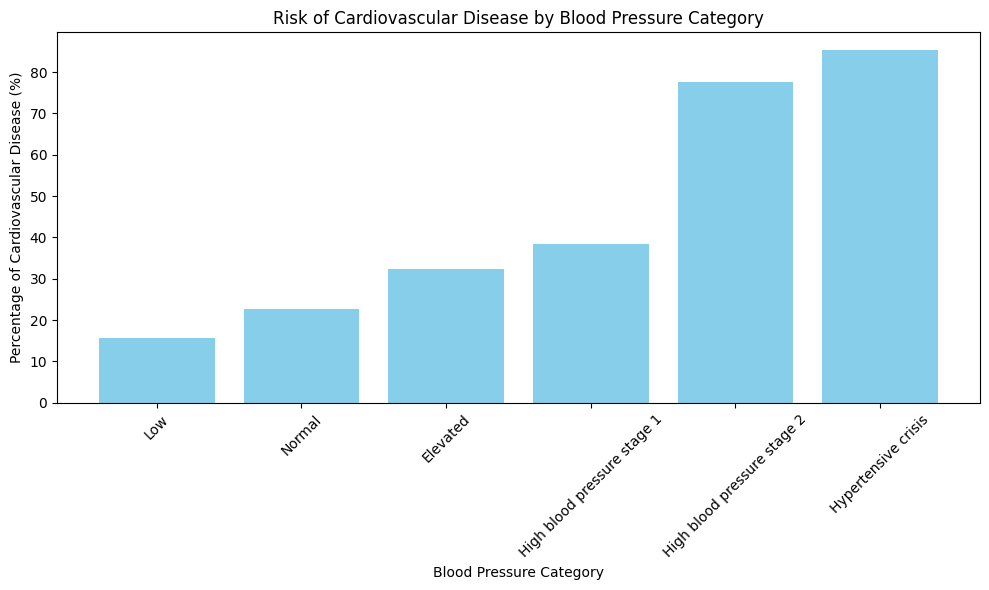

In [ ]:
# Sort the blood pressure categories in a specific order
bp_order = [
    'Low',
    'Normal',
    'Elevated',
    'High blood pressure stage 1',
    'High blood pressure stage 2',
    'Hypertensive crisis'
]

# Filter the data to keep only the rows where 'cardio = 1' (i.e., people with cardiovascular disease)
cardio_risk = bp_cardio_counts[bp_cardio_counts['cardio'] == 1]

# Ensure the 'blood_pressure_category' column is treated as a categorical variable with the correct order
cardio_risk['blood_pressure_category'] = pd.Categorical(
    cardio_risk['blood_pressure_category'],
    categories=bp_order,
    ordered=True
)

# Sort the data by the defined blood pressure order
cardio_risk = cardio_risk.sort_values('blood_pressure_category')

# Plotting the risk of cardiovascular disease by blood pressure category
plt.figure(figsize=(10, 6))
plt.bar(cardio_risk['blood_pressure_category'], cardio_risk['percentage'], color='skyblue')

# Add labels and title
plt.title('Risk of Cardiovascular Disease by Blood Pressure Category')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Percentage of Cardiovascular Disease (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()


Based on this bar chart, it is clear that the higher the blood pressure, the higher the risk of cardiovascular disease.

      3) Get insight of the relationship between blood pressue and age.

Pseudocode:

          Get the percentage counts
          Visualise the result as a bar graph

In [ ]:
#Get the percentage counts
# Group by 'age_group' and 'blood_pressure_category', and count occurrences
counts_age_bp = analysis3_df.groupby(['age_group', 'blood_pressure_category']).size().reset_index(name='count')

# Calculate the total count for each 'age_group'
counts_age = analysis3_df.groupby('age_group').size().reset_index(name='total_count')

# Merge the total counts with the grouped counts
counts_age_bp = pd.merge(counts_age_bp, counts_age, on='age_group')

# Calculate the percentage of each blood pressure category within each age group
counts_age_bp['percentage'] = (counts_age_bp['count'] / counts_age_bp['total_count']) * 100

counts_age_bp


<ipython-input-140-4fa0d5d87473>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_age_bp = analysis3_df.groupby(['age_group', 'blood_pressure_category']).size().reset_index(name='count')
<ipython-input-140-4fa0d5d87473>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_age = analysis3_df.groupby('age_group').size().reset_index(name='total_count')


,age_group,blood_pressure_category,count,total_count,percentage
0,<40,Elevated,98,1864,5.257511
1,<40,High blood pressure stage 1,858,1864,46.030043
2,<40,High blood pressure stage 2,341,1864,18.293991
3,<40,Hypertensive crisis,13,1864,0.697425
4,<40,Low,66,1864,3.540773
5,<40,Normal,488,1864,26.180258
6,40-49,Elevated,981,19438,5.046816
7,40-49,High blood pressure stage 1,9204,19438,47.350550
8,40-49,High blood pressure stage 2,5015,19438,25.799979
9,40-49,Hypertensive crisis,185,19438,0.951744


<ipython-input-141-dc4d1394bf51>:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(counts_age_bp, values='percentage', index='age_group', columns='blood_pressure_category', fill_value=0)


blood_pressure_category       Low     Normal  Elevated  \
age_group                                                
<40                      3.540773  26.180258  5.257511   
40-49                    2.037247  18.813664  5.046816   
50-59                    0.983202  10.330792  4.465975   
60+                      0.423559   7.232478  3.772077   

blood_pressure_category  High blood pressure stage 1  \
age_group                                              
<40                                        46.030043   
40-49                                      47.350550   
50-59                                      48.323110   
60+                                        44.226005   

blood_pressure_category  High blood pressure stage 2  Hypertensive crisis  
age_group                                                                  
<40                                        18.293991             0.697425  
40-49                                      25.799979             0.951744  
50-59     

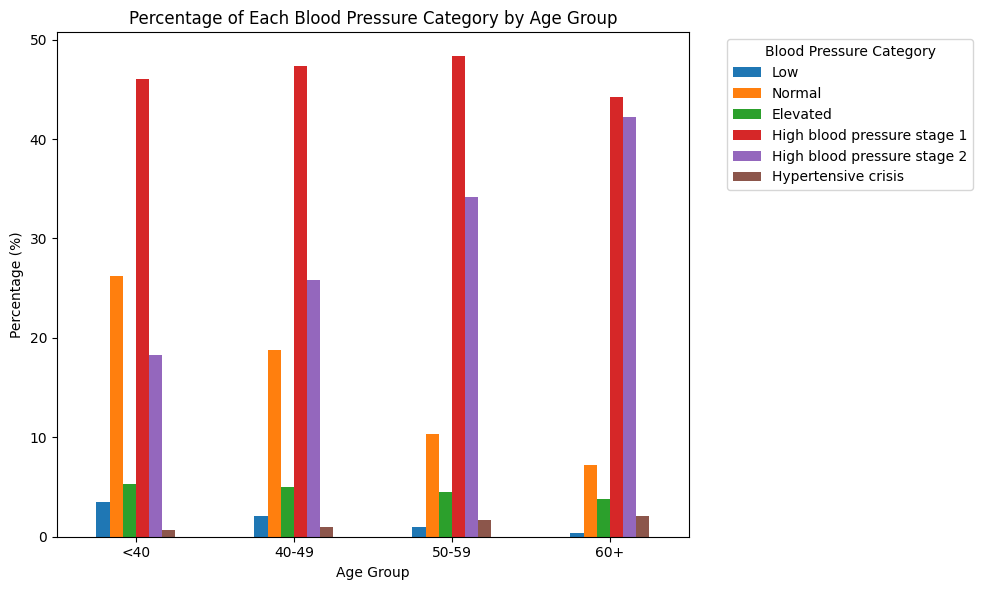

In [ ]:
#display the bar graph
# Ensure the 'blood_pressure_category' column is treated as a categorical variable with the correct order
counts_age_bp['blood_pressure_category'] = pd.Categorical(
    counts_age_bp['blood_pressure_category'],
    categories=bp_order,
    ordered=True
)

# Create a pivot table for better visualization, ordered by the defined blood pressure category order
pivot_table = pd.pivot_table(counts_age_bp, values='percentage', index='age_group', columns='blood_pressure_category', fill_value=0)

# Reorder the columns in the pivot table according to the desired order
pivot_table = pivot_table[bp_order]

# Display the pivot table
print(pivot_table)

# Plotting the chances of getting each blood pressure category by age group
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Each Blood Pressure Category by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Blood Pressure Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From this graph, we can see an increase in high blood pressure stage 2 with age.

There is a decrease in normal and low blood pressure with age.

There is a slight increase in hypertensive crisis with age.

The number of high blood pressure stage 1 is very high throughout all ages.

The number of elevated blood pressure has a slight but not substantial decrease with age.

      5) See the combined relationship between blood pressure, age and cardiovascular disease.

For this one I want to create a scatter graph with the individual ages and not as age groups.

Pseudocode:

        Group the percentages of age_year with blood pressure and cardio vascular disease.

        Create a scatter graph plotting age and cardiovascular disease, colour coded by blood pressure.



In [ ]:
#Group the percentages of age_year with blood pressure and cardio vascular disease

# Group by 'age_year', 'blood_pressure_category', and 'cardio' and count
grouped_data= analysis3_df.groupby(['age_year', 'blood_pressure_category', 'cardio']).size().reset_index(name='count')

# Calculate the total count for each 'age_year' and 'blood_pressure_category'
total_counts = analysis3_df.groupby(['age_year', 'blood_pressure_category']).size().reset_index(name='total_count')

# Merge the total counts with the grouped data
grouped_data = pd.merge(grouped_data, total_counts, on=['age_year', 'blood_pressure_category'])

# Calculate the percentage of 'cardio = 1' (cardiovascular disease) within each age and blood pressure category
grouped_data['percentage'] = (grouped_data['count'] / grouped_data['total_count']) * 100


,age_year,blood_pressure_category,cardio,count,total_count,percentage
0,29,High blood pressure stage 1,0,2,2,100.000000
1,29,Normal,0,1,1,100.000000
2,30,Normal,0,1,1,100.000000
3,39,Elevated,0,82,98,83.673469
4,39,Elevated,1,16,98,16.326531
...,...,...,...,...,...,...
306,64,Hypertensive crisis,0,5,43,11.627907
307,64,Hypertensive crisis,1,38,43,88.372093
308,64,Low,1,1,1,100.000000
309,64,Normal,0,65,125,52.000000


####Gen AI Usage
ChatGPT Prompt:

Using the above code, help me create a scatter plot.


Modification: The code ran well and I did not feel it would require modification.

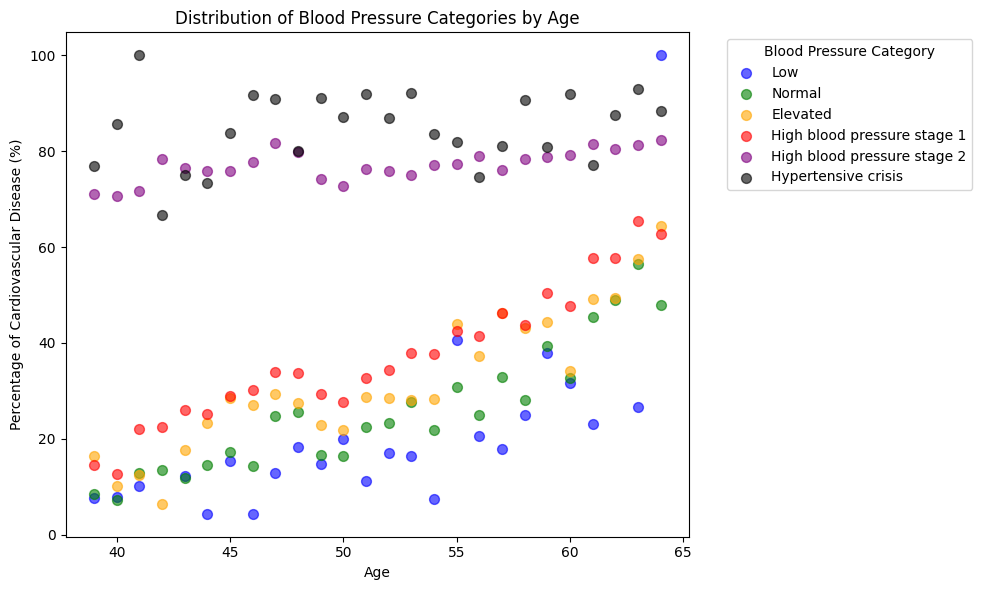

In [ ]:
#Create a scatter plot graph plotting age and cardiovascular disease, colour coded by blood pressure

# Filter the data to keep only the rows where 'cardio = 1' (i.e., people with cardiovascular disease)
cardio_risk = grouped_data[grouped_data['cardio'] == 1]

#Create scatter plot for ages and blood pressure categories

# Define a color palette for each blood pressure category
colors = {
    'Low': 'blue',
    'Normal': 'green',
    'Elevated': 'orange',
    'High blood pressure stage 1': 'red',
    'High blood pressure stage 2': 'purple',
    'Hypertensive crisis': 'black'
}

# Create figure for the scatter plot
plt.figure(figsize=(10, 6))

# Plot each blood pressure category as a separate scatter plot
for category in bp_order:
    # Filter the data for each category
    category_data = cardio_risk[cardio_risk['blood_pressure_category'] == category]

    # Scatter plot of actual age vs blood pressure category percentage
    plt.scatter(
        category_data['age_year'],  # Use actual age
        category_data['percentage'],  # Percentage for each blood pressure category
        color=colors[category],  # Color by blood pressure category
        label=category,  # Label the category
        alpha=0.6,  # Transparency for better visibility
        s=50  # Marker size
    )

# Add labels and title
plt.title('Distribution of Blood Pressure Categories by Age')
plt.xlabel('Age')
plt.ylabel('Percentage of Cardiovascular Disease (%)')
plt.legend(title='Blood Pressure Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the scatter plot
plt.show()


From the scatter plot, it is clear that there is an increase in cardiovascular disease with age.
If you have high blood pressure stage 2 or higher then regardless of age, you have a very high chance of cardiovascular disease.

As we know from the previous graph, there is a consistent distribution of stage 1 blood pressure throughout the age groups. Unlike with stage 2 and crisis, which correlate with consistently high percentages of cardiovascular disease, individuals with stage 1 blood pressure start off with under 20% of cardiovascular disease, to a steady increase to above 60% of cardiovascular disease as age progresses.

The same can be said about Low and Normal blood pressures, with the earlier result showing the lowest percentage of cardiovascular disease, there is an increase with age.

From this we can conclude that aging definitely plays a factor in increasing the risk for cardiovascular disease, with higher blood pressure leading to higher chances of cardiovascular disease, worsened by age. If blood pressure is past stage 2, the chances of cardiovascular disease becomes significant regardless of age.


      6) Gain insight on the relationship between physical activity and blood pressure.

Pseudocode:


      Group the percentage of physical activity in each blood pressure category.
      Visualise the differences in physical activity in blood pressure category.

In [ ]:
#Group the percentage of physical activity in each blood pressure category.
# Group by 'age_group' and 'blood_pressure_category', and count occurrences
count_bp_active = analysis3_df.groupby(['active', 'blood_pressure_category']).size().reset_index(name='count')

# Calculate the total count for each 'age_group'
total_counts = analysis3_df.groupby('blood_pressure_category').size().reset_index(name='total_count')

# Merge the total counts with the grouped counts
count_bp_active = pd.merge(count_bp_active, total_counts, on='blood_pressure_category')

# Calculate the percentage of each blood pressure category within each age group
count_bp_active['percentage'] = (count_bp_active['count'] / count_bp_active['total_count']) * 100

count_bp_active

,active,blood_pressure_category,count,total_count,percentage
0,0,Elevated,641,3109,20.617562
1,0,High blood pressure stage 1,6517,32454,20.080730
2,0,High blood pressure stage 2,4378,22583,19.386264
3,0,Hypertensive crisis,220,1043,21.093001
4,0,Low,176,858,20.512821
5,0,Normal,1578,8654,18.234343
6,1,Elevated,2468,3109,79.382438
7,1,High blood pressure stage 1,25937,32454,79.919270
8,1,High blood pressure stage 2,18205,22583,80.613736
9,1,Hypertensive crisis,823,1043,78.906999


<ipython-input-145-f857e4c97eda>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(count_bp_active, values='percentage', index='blood_pressure_category', columns='active', fill_value=0)


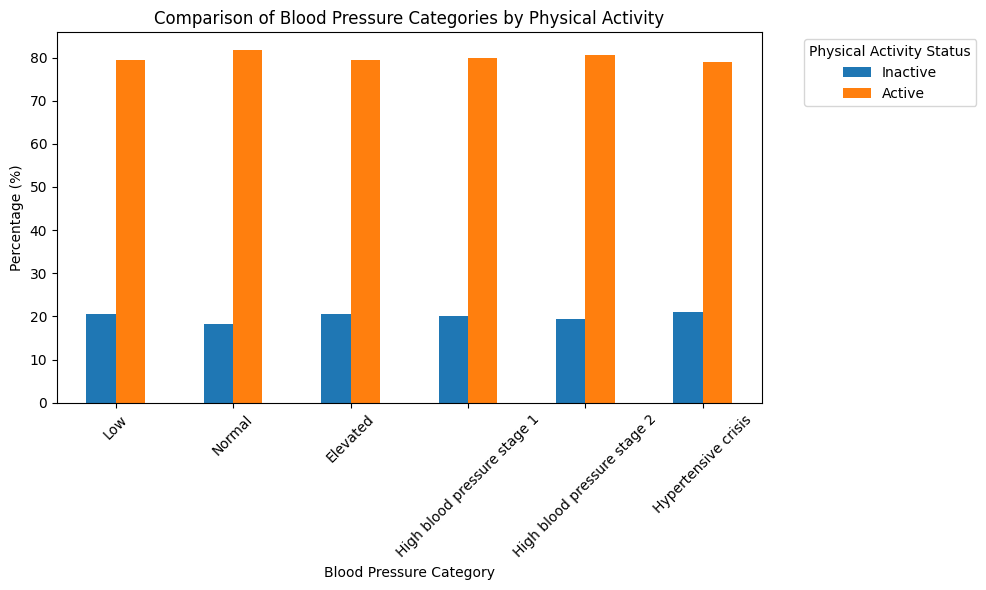

In [ ]:
# Visualise the differences in physical activity in blood pressure category.
# Ensure 'blood_pressure_category' is categorical and ordered
count_bp_active['blood_pressure_category'] = pd.Categorical(count_bp_active['blood_pressure_category'], categories=bp_order, ordered=True)

# Pivot the data for easier plotting
pivot_table = pd.pivot_table(count_bp_active, values='percentage', index='blood_pressure_category', columns='active', fill_value=0)

# Rename columns for clarity in the legend (optional)
pivot_table.columns = ['Inactive', 'Active']

# Plotting the grouped bar chart
pivot_table.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Comparison of Blood Pressure Categories by Physical Activity')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

# Add legend with user-friendly labels
plt.legend(title='Physical Activity Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


From this graph, physical activity is evenly distributed throughout all blood pressure categories. There is a high proportion of physical activity in the dataset. From this graph, we cannot clearly see a trend of higher or lower blood pressure due to physical activity.

There does not appear to be a clear trend linking physical activity and different blood pressure categories. Now I will visualise scatter graph, one with physical activity and one without i.e. where active = 1, and active = 0.

      7) See what effect physical activity has on blood pressure, age and cardiovascular disease.

Pseudocode:

        Calculate and group percentage for cardiovascular risk by age, physical activity and blood pressure category.

        Create the dual scatter plot visualisation.



In [ ]:
#Calculate percentage of cardiovascular risk by age, physical activity, and blood pressure category

# Group by 'age_year', 'blood_pressure_category', 'active', and 'cardio', and count occurrences
grouped_data = analysis3_df.groupby(['age_year', 'blood_pressure_category', 'active', 'cardio']).size().reset_index(name='count')

# Calculate the total count for each 'age_year', 'blood_pressure_category', and 'active'
total_counts = analysis3_df.groupby(['age_year', 'blood_pressure_category', 'active']).size().reset_index(name='total_count')

# Merge the total counts with the grouped data
grouped_data = pd.merge(grouped_data, total_counts, on=['age_year', 'blood_pressure_category', 'active'])

# Calculate the percentage of 'cardio = 1' (cardiovascular disease) within each age, blood pressure category, and physical activity status
grouped_data['percentage'] = (grouped_data['count'] / grouped_data['total_count']) * 100

# Filter the data to keep only the rows where 'cardio = 1' (i.e., people with cardiovascular disease)
cardio_risk = grouped_data[grouped_data['cardio'] == 1]

####Gen AI Usage:

ChatGPT Prompt:

(Copied and pasted the previous scatter plot code and the code grouped_data code in code cell above this)

How can I visualise a faceted scatter plot using this code which can show the difference between where active = 1 and active = 0?


ChatGPT Response:

        #Create faceted scatter plot for actual ages and blood pressure categories
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

        # Define a color palette for each blood pressure category
        colors = {
            'Low': 'blue',
            'Normal': 'green',
            'Elevated': 'orange',
            'High blood pressure stage 1': 'red',
            'High blood pressure stage 2': 'purple',
            'Hypertensive crisis': 'black'
        }

        # Plot for Active = 1 (Physically Active)
        for category in colors:
            category_data = cardio_risk[(cardio_risk['blood_pressure_category'] == category) & (cardio_risk['active'] == 1)]
            ax1.scatter(category_data['age_year'], category_data['percentage'], color=colors[category], label=category, alpha=0.6, s=50)
        ax1.set_title('Physically Active (Active = 1)')
        ax1.set_xlabel('Age')
        ax1.set_ylabel('Cardiovascular Risk (%)')

        # Plot for Active = 0 (Physically Inactive)
        for category in colors:
            category_data = cardio_risk[(cardio_risk['blood_pressure_category'] == category) & (cardio_risk['active'] == 0)]
            ax2.scatter(category_data['age_year'], category_data['percentage'], color=colors[category], label=category, alpha=0.6, s=50)
        ax2.set_title('Physically Inactive (Active = 0)')
        ax2.set_xlabel('Age')

        # Add a shared legend
        fig.legend(title='Blood Pressure Category', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

Modification:

The resulted graph repeated the legend twice, I asked ChatGPT to modify the code to remove the second legend.

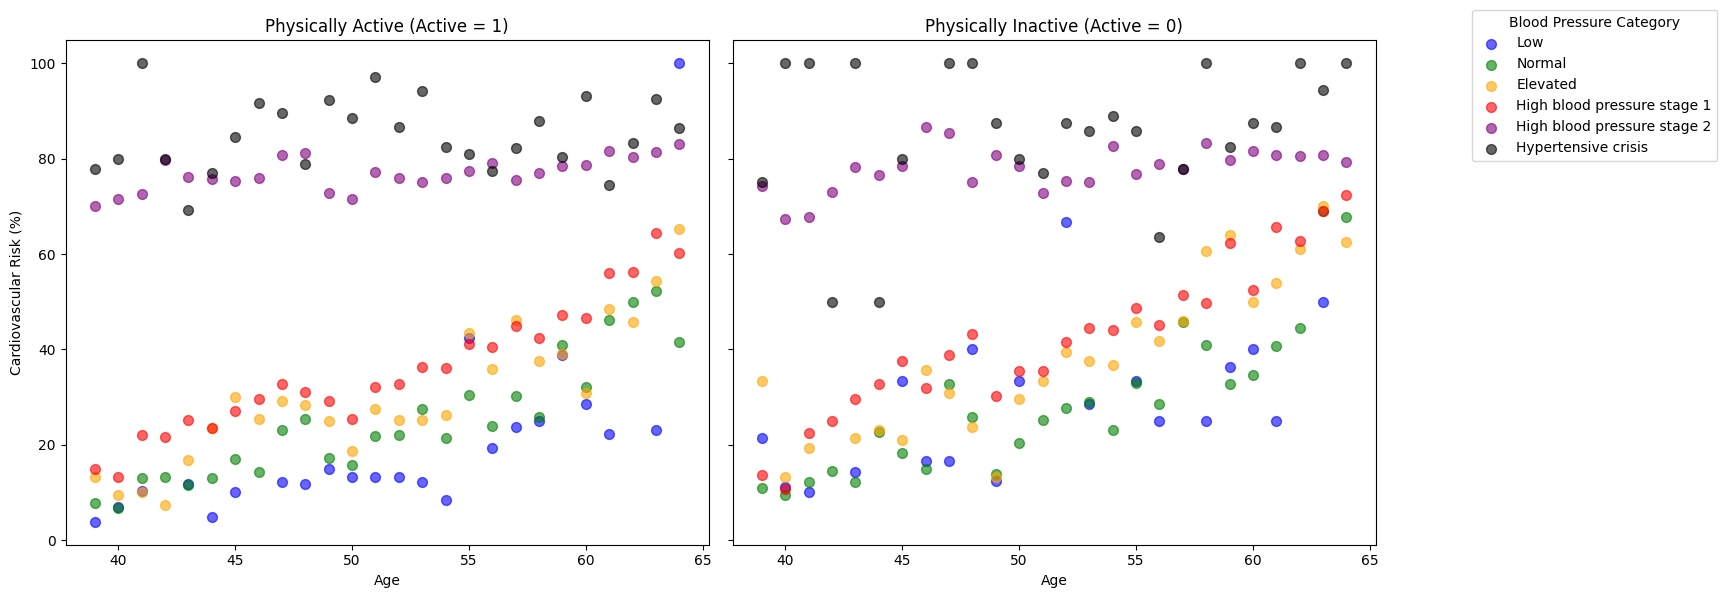

In [ ]:
#Create faceted scatter plot for actual ages and blood pressure categories
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Define a color palette for each blood pressure category
colors = {
    'Low': 'blue',
    'Normal': 'green',
    'Elevated': 'orange',
    'High blood pressure stage 1': 'red',
    'High blood pressure stage 2': 'purple',
    'Hypertensive crisis': 'black'
}

# Plot for Active = 1 (Physically Active)
for category in colors:
    category_data = cardio_risk[(cardio_risk['blood_pressure_category'] == category) & (cardio_risk['active'] == 1)]
    ax1.scatter(category_data['age_year'], category_data['percentage'], color=colors[category], label=category, alpha=0.6, s=50)
ax1.set_title('Physically Active (Active = 1)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Cardiovascular Risk (%)')

# Plot for Active = 0 (Physically Inactive)
for category in colors:
    category_data = cardio_risk[(cardio_risk['blood_pressure_category'] == category) & (cardio_risk['active'] == 0)]
    ax2.scatter(category_data['age_year'], category_data['percentage'], color=colors[category], label=category, alpha=0.6, s=50)
ax2.set_title('Physically Inactive (Active = 0)')
ax2.set_xlabel('Age')

# Add a single shared legend for both plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title='Blood Pressure Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

There is not a large difference when physical activity is involved or not.
Physical activity appears to have negligible effect on cardiovascular disease.There may be a slight decrease in cardiovascular disease when physically inactive for individuals with blood pressures in hypertensive crisis levels.
There may also be an increase in cardiovascular risk when blood pressure is Low if physically inactive.


###*Conclusion*

The combination of factors such as age, blood pressure, and physical activity has the following effect on cardiovascular disease:

Blood pressure contributes to higher cardiovascular risk, with extremely high risk when blood pressure is at stage 2 or higher.

With older age, there is an increased risk of cardiovascular disease regardless of blood pressure.

The effect of physical activity on cardiovascular risk appears to be minimal. However, being physically inactive can reduce high cardiovascular risk when blood pressures are on the extreme end of high. On the flip side, there may also be an increase in cardiovascular risk when blood pressure is low if physically inactive.


## Example 4: Gender, cholesterol, and alcohol consumption

The following algorithm was developed for this part:

    1) Extract the relevant data from the med_ex_df dataframe into a new dataframe
    2)Create new columns specifying gender and alcohol labels
    3) Get insight of the relationship between cholesterol and cardiovascular disease.
    4) Visualise all 3 combination.



    1) Extract the relevant data from the med_ex_df dataframe into a new dataframe

In [ ]:
#keep only the specified columns for gender, cholestrol, alco and cardio
analysis4_df=med_ex_df[['gender', 'cholesterol', 'alco', 'cardio']]
print(analysis4_df)

       gender  cholesterol  alco  cardio
0           2            1     0       0
1           1            3     0       1
2           1            3     0       1
3           2            1     0       1
4           1            1     0       0
...       ...          ...   ...     ...
69995       2            1     0       0
69996       1            2     0       1
69997       2            3     1       1
69998       1            1     0       1
69999       1            2     0       0

[68744 rows x 4 columns]


      2) create new columns specifying gender and alcohol labels

  

In [ ]:
#create a new column specifying gender labels
analysis4_df.loc[:, 'gender_label'] = analysis4_df['gender'].map({1: 'Female', 2: 'Male'})

In [ ]:
# create new column 'alco_label' column specifying alco label
analysis4_df.loc[:, 'alco_label'] = analysis4_df['alco'].map({0: 'Non-drinker', 1: 'Drinker'})


        3) Get insight of relationship between cholesterol and cardiovascular disease

Pseudocode:

      Group the percentage for cholesterol and cardiovascular

      Visualise the bar chart

In [ ]:
# Group by 'cholesterol' and 'cardio', and count
cholesterol_cardio_counts = analysis4_df.groupby(['cholesterol', 'cardio']).size().reset_index(name='count')

# Calculate the total count for each 'cholesterol'
cholesterol_counts = analysis4_df.groupby('cholesterol').size().reset_index(name='total_count')

# Merge the total counts with the grouped counts
cholesterol_cardio_counts = pd.merge(cholesterol_cardio_counts, cholesterol_counts , on='cholesterol')

#Calculate the percentage of blood pressure category in each cardio
cholesterol_cardio_counts['percentage'] = (cholesterol_cardio_counts['count'] / cholesterol_cardio_counts['total_count']) * 100

cholesterol_cardio_counts

,cholesterol,cardio,count,total_count,percentage
0,1,0,29101,51555,56.446513
1,1,1,22454,51555,43.553487
2,2,0,3758,9308,40.373872
3,2,1,5550,9308,59.626128
4,3,0,1869,7881,23.715265
5,3,1,6012,7881,76.284735


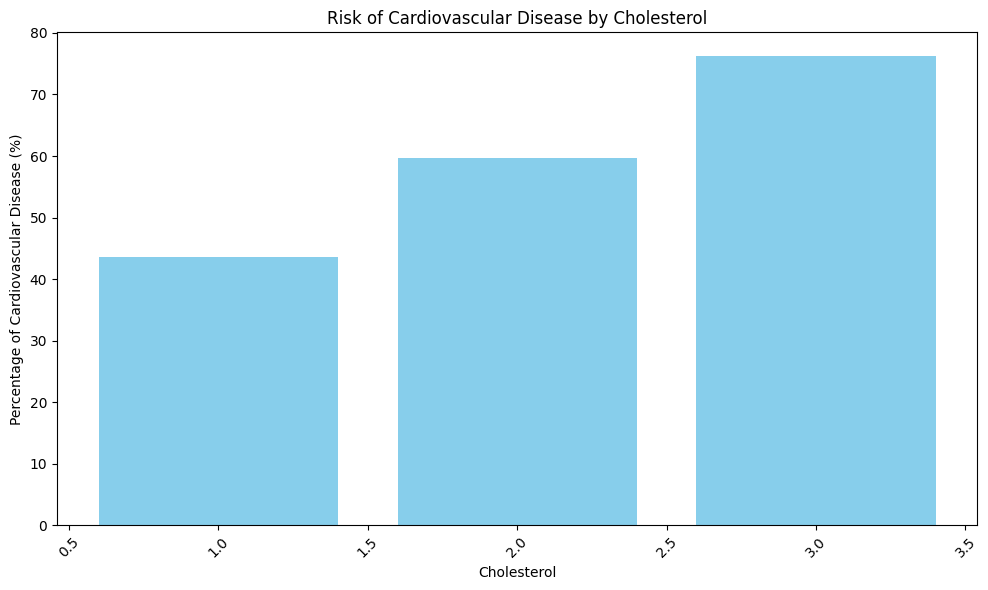

In [ ]:
cardio_risk = cholesterol_cardio_counts[cholesterol_cardio_counts['cardio'] == 1]

# Sort the data by the defined blood pressure order
cardio_risk = cardio_risk.sort_values('cholesterol')

# Plotting the risk of cardiovascular disease by blood pressure category
plt.figure(figsize=(10, 6))
plt.bar(cardio_risk['cholesterol'], cardio_risk['percentage'], color='skyblue')

# Add labels and title
plt.title('Risk of Cardiovascular Disease by Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Percentage of Cardiovascular Disease (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

The cholesterol numbers have the following meaning:

1 = Normal cholesterol

2 = Above normal cholesterol

3 = Well above normal cholesterol

From this graph, it is clear that higher cholesterol leads increases cardiovascular risk.

Initially, I wished to see if alcohol consumption would lead to higher cholesterol, however due to the data type of cholesterol being very generalised in 3 categories, it made more sense to visualise the 3 combinations altogether in one visualisation. I was unable to do this in the previous analysis, however as there are much less categories, and because gender only has 2 categories, a bar chart will be able to visualise all 3 combinations.

     4) Visualise combination of all 3.

Pseudocode:

        Group gender_label, alco_label, cholesterol and cardio, calculate percentage

        Visualise the bar chart

In [ ]:
#Group gender_label, alco_label, cholesterol and cardio, calculate percentage

# Group the data by cholesterol, alcohol consumption, gender, and cardio
grouped = analysis4_df.groupby(['cholesterol', 'alco_label', 'gender_label', 'cardio']).size().reset_index(name='count')

# Calculate the total count for each combination of gluc, alco, and gender (ignoring cardio initially)
total_counts = analysis4_df.groupby(['cholesterol', 'alco_label', 'gender_label']).size().reset_index(name='total_count')

# Merge the total counts back with the grouped data
grouped = pd.merge(grouped, total_counts, on=['cholesterol', 'alco_label', 'gender_label'])

# Calculate the percentage of cardio = 0 and cardio = 1 within each group
grouped['percentage'] = (grouped['count'] / grouped['total_count']) * 100

# Display the result
print(grouped)


    cholesterol   alco_label gender_label  cardio  count  total_count  \
0             1      Drinker       Female       0    411          685   
1             1      Drinker       Female       1    274          685   
2             1      Drinker         Male       0   1092         1789   
3             1      Drinker         Male       1    697         1789   
4             1  Non-drinker       Female       0  18427        32383   
5             1  Non-drinker       Female       1  13956        32383   
6             1  Non-drinker         Male       0   9171        16698   
7             1  Non-drinker         Male       1   7527        16698   
8             2      Drinker       Female       0    127          244   
9             2      Drinker       Female       1    117          244   
10            2      Drinker         Male       0    188          459   
11            2      Drinker         Male       1    271          459   
12            2  Non-drinker       Female       0  

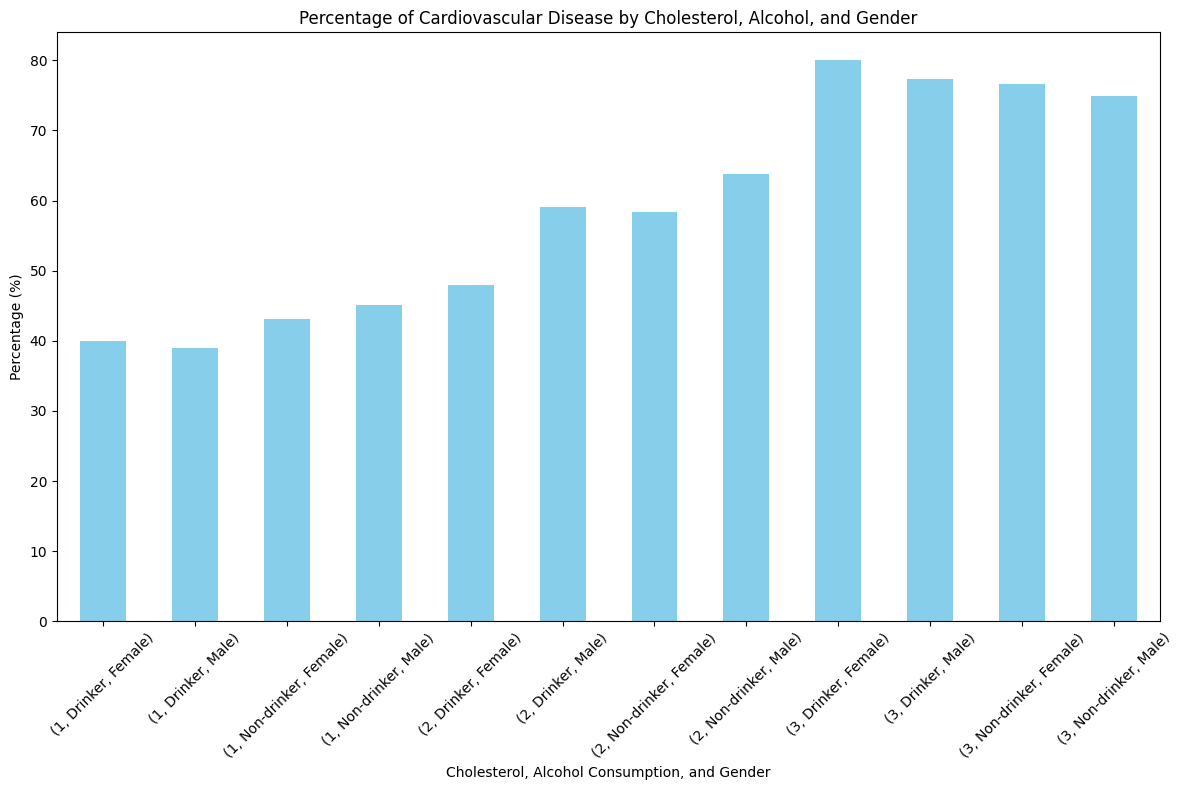

In [ ]:
#Visualise the bar chart

# Pivot the data for visualization
pivot_table = grouped.pivot_table(index=['cholesterol', 'alco_label', 'gender_label'], columns='cardio', values='percentage').fillna(0)

# Filter the pivot_table to include only the 'cardio = 1' column
pivot_table_cardio_1 = pivot_table[1]  # Select only the column where cardio = 1

# Plot the bar chart
pivot_table_cardio_1.plot(kind='bar', figsize=(12, 8), color='skyblue')

# Add labels and title
plt.title('Percentage of Cardiovascular Disease by Cholesterol, Alcohol, and Gender')
plt.xlabel('Cholesterol, Alcohol Consumption, and Gender')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


As mentioned earlier the cholesterol numbers have the following meaning:

1 = Normal cholesterol

2 = Above normal cholesterol

3 = Well above normal cholesterol


From this visualisation, we can see that the most prevalent cardiovascular risk combination is females who drink alcohol and have a cholestrol category of 3 i.e. well above normal.

Surprisingly, when the cholesterol category is 1 (normal), there is a slightly higher risk of cardiovascular disease when the individual does not drink alcohol, applying to both male and female. However, females who drink is higher than males who drink. Conversely, males who don't drink have higher risk than females who don't drink.

At cholesterol level 2 we can see the following:
There is a significant gap between females who drink versus the remaining three combinations (males who drink, females who don't drink, and males who don't drink), with the latter being more likely to cardiovascular disease. Males have higher cardiovascular risk than females at cholesterol level 2.

At cholesterol level 3: not drinking appears to allow a minor decrease in cardiovascular risk, however it is still high. Females have slightly more risk than males at cholesterol level 3.


#6. Test solution with a variety of data

We tested our programs with the database provided, and it worked. We were able to do analysis from the results.

## Reflection

**Individual Achievement of Learning Outcomes**

**Johanne:**

 This unit have provided me with knowledge and experience in python coding, and it has, through the labs and the lectures, provided a good overview of what python is and how it works, both theoretically and practically. Assessment 2 was a good way for us to put together everything we have learnt this semester, giving us plenty of freedom to explore and use different techniques to solve the assessment. The groupwork was also a good opportunity to see how it is to work in a team of developers, and to see how different strengths can come together to solve the problem.
The exercises we have done in the labs have been good practice for me to test and use what we learn in the lectures, and they give good examples on how python works and how to problem solve and use external sites to find code, such as w3school.
In the labs and through the assignments, I have learned and used different theories to develop code and algorithms to meet the criteria for the assignments and the labs. Through the assignments, I have also been able to use different techniques to solve problems and develop code as well as be able to test and run my codes and programs. An important part of developing code is to describe and explain what I do, which is something I have gotten good practice from in labs and through assignments. Through the assessments, we have been asked to develop a program using the problem-solving method, thought in lectures. This has helped learn to develop algorithms and code to run programs.
Two valuable takeaways from this unit it that I have learned and understood what programming is. I might not be able to solve or develop code as a job, but it has given me important insight in how programming work, helping me understand. I think this is an important insight into programming because it will give me some perspective when I, most likely in the future, will work closely with developers. To have this insight in how programming and Python works, I know more of how a program is built and what it takes to make it run and work properly, which is important, as I strongly believe that programming and IT will become, and already is, an important part of any business.
The other valuable takeaway from this unit is that I have learned to respect people developing and creating code. I know how much work one must put into developing programs, and how important it is to be very precise with no typos. It has given me great respect for those who does this as a job and people who try to learn. Programming is complicated, and one must truly understand and know what to look for to be able to develop the right functions and programs.

**Monika**
In the unit I was able to learn the basics of Python programming as well as computational thinking with the six step problem-solving framework as a base of  program development. While for me personally the lectures were a short introduction to the topic, the computer laboratories were very helpful in understanding many aspects by the application in class. In the assessments I was able to further apply the learned skills myself by working on a relevant task. The first assessment helped me greatly to strengthen my skills in the basics of python, including functions, loops and statements, mostly guided by the unit modules 1,2 and 3. Creating a functional program to calculate health risks reflected the achievement of the units in the first half of the semester. In module 8 and the second assignment I learnt about databases and how to work with this data with the help of python which I never had contact points with before. While the database inspection and first processing was clear for me based on what we have learned in the lecture and computer laboratory, I found it hard to process the data further into a strong analysis by myself. Furthermore, I was able to gain an insight into the possibilities over the basic python programming in the modules 9 with the expansion to the internet or in module 11 with the different possible graphical user interfaces. The most valuable takeaway from the unit for me is the six step problem-solving framework since it puts down the task into smaller parts with better understanding, overcoming the challenge to just start directly into the task and get lost. Another valuable takeaway is the error handling and input validation from module 4 since this can already be a major challenge in a code, making it easily malfunctional. By handling these already in the beginning of code writing, problems can be avoided more easily.


**Iman**
 In this unit, I feel I have definitely been able to grasp the basics of programming as well as understanding how to tackle problems by following the six-step problem-solving framework. I feel that with both assessments, I was able to apply critical thinking skills in understanding how to complete the required task. I learn tremendously more from having to actually do the task rather than just learn from seeing it demonstrated in class. For this assessment, I feel that it would have been better if we were taught a bit more in-class on knowing how to spot issues in the data that needed cleaning. For example, in lab 10 even though we covered what the codes .describe() for a dataframe would do, I did not fully understand the purpose of looking at it, and that it would be important for this assessment to properly look at the max and min values. However, the challenge of both assessments has helped me grow my understanding of what is expected when it comes to completing a task in python programming. I feel that learning through Generative AI has been a great tool to use alongside course materials and the learning resources (such as websites) that the unit has provided. In terms of the learning outcomes, I think the first half of the semester covered all 3 learning outcomes. Assessment 1 directly helped with achieving learning outcome 2 (Design and develop an application based on specific criteria). The lectures were in-depth in understanding the theory aspect for learning outcome 3. And again, both assessments have helped in understanding how to develop algorithms for solving problems (learning outcome 1). My 2 takeaways from this unit is definitely the six-step framework which is a useful tool in breaking up daunting tasks, and also I have gained foundational understanding of coding standards. While I definitely struggled with the assessments, such as for this assessment I struggled with the blood pressure categories, I feel that once I overcome the struggle, my understanding grows. I feel that some of the challenges I had to overcome in both assessment tasks have really taught me to develop stronger critical thinking skills.



**GenAI Use for Learning**

The use of Gen AI is a great tool, but it does not provide enough support to help us fully learn python programming. For the programming class, especially for the computer laboratory, AI was not needed much anyways since the lecture and notebooks were constructed with the available code. When there are small mistakes in trying to develop our own code during class, it is great to have AI tools to analyse and correct it, especially if you are still learning how to program. That is usually helpful for syntax errors or spelling mistakes that can easily be overseen as a beginner (e.g. colons in statements, capitalizing etc.). Generally, we can use AI to help us to solve problems and create code that will help our program run, but AI sometimes give the wrong code, or it doesn’t give a code good enough for the program due to lack of information or wrong commands from the user. AI only gives you exactly what you ask for, so if you cannot exactly specify, the use of Gen AI could result in wrong code. So, using AI is helpful, but one must also be critical too what it gives you.
An instructor like a tutor can guide you into the right direction of your coding problem without telling you directly the solution which is more helpful in developing your skills since you have to actively think about it rather than taking the finalized code from AI. For instance, for the laboratory 9 with the sqlite-notebook, we had to develop the notebook ourselves but got hints from the instructor when we were struggling. For learning without an instructor, AI can be useful to search for suitable algorithm parts to use rather than searching for them for a long time on the internet.
Since this assignment was a group assignment, discussions within the group are helpful to come forward but since we all are learning there were problems we could not even solve together and relied on the help of AI, such as creating different analysis insights of the given data.
The documentation of AI usage is very helpful to understand the impact of your own prompts as well as the outcome from those prompts, which can lead to better and more specific and helpful usage of the tool. Further, the documentation enables an easier distinction between the AI generated work and your own work/modifications on the code. As discussed above, the code is not always directly the solution we want and sometimes we have to articulate ourselves better in order to specify the task of the code. It can be challenging to find the right explanation of what you expect AI, but it also helps your own understanding a lot.
